In [1]:
import pandas as pd
import numpy as np
import seaborn as sns    

from matplotlib import pyplot as plt
from sklearn.preprocessing import minmax_scale
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot


In [2]:
pwd

'C:\\Users\\sarah\\Desktop\\COVID19 competition'

In [3]:
"""df = pd.read_csv('csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
df_state = df.iloc[:,6:7] 
df_state"""

"df = pd.read_csv('csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')\ndf_state = df.iloc[:,6:7] \ndf_state"

In [4]:
"""df = df.iloc[:,91:-15]
df"""

'df = df.iloc[:,91:-15]\ndf'

In [5]:
"""df_concat = pd.concat([df_state, df], axis=1)
df_concat"""

'df_concat = pd.concat([df_state, df], axis=1)\ndf_concat'

In [6]:
#df_concat.to_csv('./modified_plus.csv', )

In [7]:
"""dt = pd.read_csv('modified_plus.csv')
dt.head()

dt = dt.iloc[:,1:]"""

"dt = pd.read_csv('modified_plus.csv')\ndt.head()\n\ndt = dt.iloc[:,1:]"

In [8]:
#dt


In [9]:
"""col = list(dt.columns)
del col[0]
i = ""
j = ""
for i in list(dt['Province_State'].unique()):
    dt_tmp = dt[dt['Province_State'] == str(i)]
    lst = []
    lst.append(str(i))
    for j in col:
        tmp = dt_tmp[str(j)].sum()
        lst.append(tmp)
        #print(lst)
    dt.loc[len(dt) + 1] = lst"""

'col = list(dt.columns)\ndel col[0]\ni = ""\nj = ""\nfor i in list(dt[\'Province_State\'].unique()):\n    dt_tmp = dt[dt[\'Province_State\'] == str(i)]\n    lst = []\n    lst.append(str(i))\n    for j in col:\n        tmp = dt_tmp[str(j)].sum()\n        lst.append(tmp)\n        #print(lst)\n    dt.loc[len(dt) + 1] = lst'

In [10]:
#dt.to_csv('./modified_plus_v2.csv') 

In [11]:
"""md = pd.read_csv('modified_plus_v2.csv')
md.head()

md = md.drop('Province_State', axis = 1)
md.head()"""

"md = pd.read_csv('modified_plus_v2.csv')\nmd.head()\n\nmd = md.drop('Province_State', axis = 1)\nmd.head()"

In [12]:
"""mm = pd.read_csv('modified_plus_v2.csv')
mm.head()
mm_ps = mm['Province_State']

mm = mm.drop('Province_State', axis = 1)
mm.head()"""

"mm = pd.read_csv('modified_plus_v2.csv')\nmm.head()\nmm_ps = mm['Province_State']\n\nmm = mm.drop('Province_State', axis = 1)\nmm.head()"

In [13]:
"""for i in range(len(md)):
    for j in range(len(list(md.columns)) - 1):
        lst = list(md.columns)
        #print(md[lst[j + 1]][i])
        #print(mm[lst[j]][i])
        md[lst[j + 1]][i] = md[lst[j + 1]][i] - mm[lst[j]][i]
        
md"""

'for i in range(len(md)):\n    for j in range(len(list(md.columns)) - 1):\n        lst = list(md.columns)\n        #print(md[lst[j + 1]][i])\n        #print(mm[lst[j]][i])\n        md[lst[j + 1]][i] = md[lst[j + 1]][i] - mm[lst[j]][i]\n        \nmd'

In [14]:
#md.shape

In [15]:
"""md = md.drop('2004-11-20', axis = 1)
md_concat = pd.concat([mm_ps, md], axis=1)
md_concat.head(5)"""

"md = md.drop('2004-11-20', axis = 1)\nmd_concat = pd.concat([mm_ps, md], axis=1)\nmd_concat.head(5)"

In [16]:
#md_concat.to_csv('md_concat_v1.csv')

In [83]:
cases = pd.read_csv('md_concat_v1.csv')
cases.head(5)
print(cases.columns)

Index(['date', 'ak', 'dc', 'mt', 'nj', 'ri', 'wy'], dtype='object')


In [84]:
data = pd.read_csv('overall-state-smoothed.csv')
data.head()
data = data.fillna(0)

In [85]:
data_unique = data['state_code'].unique()
print(data_unique)
print(len(data_unique))

['ak' 'al' 'ar' 'az' 'ca' 'co' 'ct' 'dc' 'de' 'fl' 'ga' 'hi' 'ia' 'id'
 'il' 'in' 'ks' 'ky' 'la' 'ma' 'md' 'me' 'mi' 'mn' 'mo' 'ms' 'mt' 'nc'
 'nd' 'ne' 'nh' 'nj' 'nm' 'nv' 'ny' 'oh' 'ok' 'or' 'pa' 'pr' 'ri' 'sc'
 'sd' 'tn' 'tx' 'ut' 'va' 'vt' 'wa' 'wi' 'wv' 'wy']
52


In [86]:
data = data[data['gender'] == 'overall']

print(data['gender'].unique())
print(data['age_bucket'].unique())

data_overall = data[data['age_bucket'] == 'overall'].reset_index()
data_overall = data_overall.drop('index', axis = 1)
data_overall.head(5)

['overall']
['18-34' '35-54' '55+' 'overall']


,date,state_code,gender,age_bucket,summed_n,smoothed_pct_cli,smoothed_pct_ili,smoothed_pct_cli_anosmia_ageusia,smoothed_pct_hh_cli,smoothed_pct_cmnty_cli,...,smoothed_pct_diabetes_weighted,smoothed_pct_cancer_weighted,smoothed_pct_heart_disease_weighted,smoothed_pct_high_blood_pressure_weighted,smoothed_pct_asthma_weighted,smoothed_pct_chronic_lung_disease_weighted,smoothed_pct_kidney_disease_weighted,smoothed_pct_autoimmune_disorder_weighted,smoothed_pct_no_above_medical_conditions_weighted,smoothed_pct_multiple_medical_conditions_weighted
0,2020-09-16,ak,overall,overall,848,0.8393,0.9583,2.1540,0.8273,16.1360,...,0.0000,4.3422,5.0818,29.5584,16.9182,4.4280,2.4863,5.0619,51.5475,23.5922
1,2020-09-15,ak,overall,overall,891,0.7988,0.9121,1.9366,0.9004,15.5885,...,0.0000,4.2922,5.0401,30.1120,16.0668,3.7497,2.0922,4.8509,51.8373,22.5938
2,2020-09-14,ak,overall,overall,881,0.6935,0.8080,1.8442,0.9106,15.0951,...,0.1698,4.5952,5.6259,28.3941,15.6917,3.3355,2.1318,4.3655,53.6944,22.5709
3,2020-09-13,ak,overall,overall,855,0.8320,0.9500,2.1352,0.9383,15.0398,...,1.5282,5.2422,5.8968,28.4693,15.0562,2.9822,2.1187,4.5894,54.3642,22.6836
4,2020-09-12,ak,overall,overall,813,0.7462,0.8703,2.2397,0.8638,16.5349,...,2.8315,4.5066,5.4110,29.1122,13.9802,2.5139,2.2098,4.8079,54.7855,22.0489


In [87]:
cases['date'].unique()
print(len(cases['date'].unique()))

158


In [88]:

"""
District of Columbia, DC, 0.71. 710
New Jersey, NJ, 8.88, 8880
Rhode Island, RI, 1.06,  1060
Puerto Rico, PR, 
Massachusetts, MA, 6.89
"""

"""
Alaska, AK, 0.73, 730
Wyoming, WY, 0.58, 580
Montana, MT, 1.07, 1070
North Dakota, ND, 0.76, 760
South Dakota, SD, 0.88, 880
"""

'\nAlaska, AK, 0.73, 730\nWyoming, WY, 0.58, 580\nMontana, MT, 1.07, 1070\nNorth Dakota, ND, 0.76, 760\nSouth Dakota, SD, 0.88, 880\n'

# Alaska / AK

In [23]:
data_unique = data['state_code'].unique()
print(data_unique)

ak_overall = data_overall[data_overall['state_code'] == 'ak']
ak_overall = ak_overall.sort_values(by = 'date', ascending = True)

cases_ak = pd.concat([cases['ak'], ak_overall], axis=1)
cases_ak

#data_overall[data_overall['state_code'] == ] 

['ak' 'al' 'ar' 'az' 'ca' 'co' 'ct' 'dc' 'de' 'fl' 'ga' 'hi' 'ia' 'id'
 'il' 'in' 'ks' 'ky' 'la' 'ma' 'md' 'me' 'mi' 'mn' 'mo' 'ms' 'mt' 'nc'
 'nd' 'ne' 'nh' 'nj' 'nm' 'nv' 'ny' 'oh' 'ok' 'or' 'pa' 'pr' 'ri' 'sc'
 'sd' 'tn' 'tx' 'ut' 'va' 'vt' 'wa' 'wi' 'wv' 'wy']


,ak,date,state_code,gender,age_bucket,summed_n,smoothed_pct_cli,smoothed_pct_ili,smoothed_pct_cli_anosmia_ageusia,smoothed_pct_hh_cli,...,smoothed_pct_diabetes_weighted,smoothed_pct_cancer_weighted,smoothed_pct_heart_disease_weighted,smoothed_pct_high_blood_pressure_weighted,smoothed_pct_asthma_weighted,smoothed_pct_chronic_lung_disease_weighted,smoothed_pct_kidney_disease_weighted,smoothed_pct_autoimmune_disorder_weighted,smoothed_pct_no_above_medical_conditions_weighted,smoothed_pct_multiple_medical_conditions_weighted
0,15,2020-09-16,ak,overall,overall,848,0.8393,0.9583,2.1540,0.8273,...,0.0000,4.3422,5.0818,29.5584,16.9182,4.4280,2.4863,5.0619,51.5475,23.5922
1,5,2020-09-15,ak,overall,overall,891,0.7988,0.9121,1.9366,0.9004,...,0.0000,4.2922,5.0401,30.1120,16.0668,3.7497,2.0922,4.8509,51.8373,22.5938
2,8,2020-09-14,ak,overall,overall,881,0.6935,0.8080,1.8442,0.9106,...,0.1698,4.5952,5.6259,28.3941,15.6917,3.3355,2.1318,4.3655,53.6944,22.5709
3,8,2020-09-13,ak,overall,overall,855,0.8320,0.9500,2.1352,0.9383,...,1.5282,5.2422,5.8968,28.4693,15.0562,2.9822,2.1187,4.5894,54.3642,22.6836
4,7,2020-09-12,ak,overall,overall,813,0.7462,0.8703,2.2397,0.8638,...,2.8315,4.5066,5.4110,29.1122,13.9802,2.5139,2.2098,4.8079,54.7855,22.0489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,103,2020-04-16,ak,overall,overall,943,0.6435,0.7501,2.2541,0.8484,...,10.0879,4.7889,5.6481,26.5308,17.9775,2.6742,1.6415,7.4420,49.0859,16.8834
154,61,2020-04-15,ak,overall,overall,1263,0.6409,0.6404,2.0044,1.1109,...,9.8499,4.8488,5.2733,26.9240,16.1540,3.3310,1.7838,7.6794,50.6016,17.4964
155,75,2020-04-14,ak,overall,overall,1740,0.5825,0.6401,2.1527,1.2679,...,9.5158,4.8097,5.7158,28.1261,16.7942,3.3199,1.6203,7.4461,49.2546,17.7694
156,41,2020-04-13,ak,overall,overall,2303,0.6632,0.7513,2.2505,1.2619,...,9.5893,4.8336,5.7503,28.5903,16.4740,3.7969,1.8701,6.9752,49.4718,18.5394


In [24]:

lst_1 = []
for i in cases_ak.columns:
    if "pct" not in i:
        lst_1.append(i)
        
print(lst_1, '\n') 

del lst_1[0]
del lst_1[0]
del lst_1[3]

print(lst_1)

cases_ak_drop = cases_ak.drop(lst_1, axis = 1) 
cases_ak_drop.head(5)
print(cases_ak_drop.columns)

['ak', 'date', 'state_code', 'gender', 'age_bucket', 'summed_n', 'smoothed_mean_hh_cli_ct', 'smoothed_mean_cmnty_cli_ct', 'smoothed_mean_outside_hh_contact_at_work_ct', 'smoothed_mean_outside_hh_contact_shopping_ct', 'smoothed_mean_outside_hh_contact_in_social_gatherings_ct', 'smoothed_mean_hh_cli_ct_weighted', 'smoothed_mean_cmnty_cli_ct_weighted', 'smoothed_mean_outside_hh_contact_at_work_ct_weighted', 'smoothed_mean_outside_hh_contact_shopping_ct_weighted', 'smoothed_mean_outside_hh_contact_in_social_gatherings_ct_weighted'] 

['state_code', 'gender', 'age_bucket', 'smoothed_mean_hh_cli_ct', 'smoothed_mean_cmnty_cli_ct', 'smoothed_mean_outside_hh_contact_at_work_ct', 'smoothed_mean_outside_hh_contact_shopping_ct', 'smoothed_mean_outside_hh_contact_in_social_gatherings_ct', 'smoothed_mean_hh_cli_ct_weighted', 'smoothed_mean_cmnty_cli_ct_weighted', 'smoothed_mean_outside_hh_contact_at_work_ct_weighted', 'smoothed_mean_outside_hh_contact_shopping_ct_weighted', 'smoothed_mean_outside_hh

In [25]:
lst_2 = []

for j in cases_ak_drop.columns:
    if "weighted" in j:
        lst_2.append(j)
        
#print(lst_2)

cases_ak_drop = cases_ak_drop.drop(lst_2, axis = 1) 
#print(cases_ak_drop.columns)
cases_ak_drop.head(5)

,ak,date,summed_n,smoothed_pct_cli,smoothed_pct_ili,smoothed_pct_cli_anosmia_ageusia,smoothed_pct_hh_cli,smoothed_pct_cmnty_cli,smoothed_pct_hh_fever,smoothed_pct_hh_sore_throat,...,smoothed_pct_diabetes,smoothed_pct_cancer,smoothed_pct_heart_disease,smoothed_pct_high_blood_pressure,smoothed_pct_asthma,smoothed_pct_chronic_lung_disease,smoothed_pct_kidney_disease,smoothed_pct_autoimmune_disorder,smoothed_pct_no_above_medical_conditions,smoothed_pct_multiple_medical_conditions
0,15,2020-09-16,848,0.8393,0.9583,2.1540,0.8273,16.1360,1.4178,6.3788,...,0.0000,5.2097,6.3799,32.4272,17.2877,5.2100,2.9613,6.0410,47.5627,27.9391
1,5,2020-09-15,891,0.7988,0.9121,1.9366,0.9004,15.5885,1.5755,6.0751,...,0.0000,5.1743,6.1782,32.4058,15.8693,4.2755,2.4745,5.6312,48.8069,26.1020
2,8,2020-09-14,881,0.6935,0.8080,1.8442,0.9106,15.0951,1.3664,6.2576,...,0.2270,5.5663,6.7005,31.3683,15.6881,3.8628,2.6134,5.0050,49.9933,26.0263
3,8,2020-09-13,855,0.8320,0.9500,2.1352,0.9383,15.0398,1.5249,6.3309,...,1.7697,6.4492,6.6774,32.1284,15.8309,3.6341,2.5806,5.0438,49.9387,26.3794
4,7,2020-09-12,813,0.7462,0.8703,2.2397,0.8638,16.5349,1.2347,6.1659,...,3.3540,5.8011,6.1656,32.2241,15.4355,3.3313,2.7167,5.3156,50.6163,25.9209


In [26]:
#cases_ak_drop = cases_ak

In [27]:
cases_ak_drop.head(5)

,ak,date,summed_n,smoothed_pct_cli,smoothed_pct_ili,smoothed_pct_cli_anosmia_ageusia,smoothed_pct_hh_cli,smoothed_pct_cmnty_cli,smoothed_pct_hh_fever,smoothed_pct_hh_sore_throat,...,smoothed_pct_diabetes,smoothed_pct_cancer,smoothed_pct_heart_disease,smoothed_pct_high_blood_pressure,smoothed_pct_asthma,smoothed_pct_chronic_lung_disease,smoothed_pct_kidney_disease,smoothed_pct_autoimmune_disorder,smoothed_pct_no_above_medical_conditions,smoothed_pct_multiple_medical_conditions
0,15,2020-09-16,848,0.8393,0.9583,2.1540,0.8273,16.1360,1.4178,6.3788,...,0.0000,5.2097,6.3799,32.4272,17.2877,5.2100,2.9613,6.0410,47.5627,27.9391
1,5,2020-09-15,891,0.7988,0.9121,1.9366,0.9004,15.5885,1.5755,6.0751,...,0.0000,5.1743,6.1782,32.4058,15.8693,4.2755,2.4745,5.6312,48.8069,26.1020
2,8,2020-09-14,881,0.6935,0.8080,1.8442,0.9106,15.0951,1.3664,6.2576,...,0.2270,5.5663,6.7005,31.3683,15.6881,3.8628,2.6134,5.0050,49.9933,26.0263
3,8,2020-09-13,855,0.8320,0.9500,2.1352,0.9383,15.0398,1.5249,6.3309,...,1.7697,6.4492,6.6774,32.1284,15.8309,3.6341,2.5806,5.0438,49.9387,26.3794
4,7,2020-09-12,813,0.7462,0.8703,2.2397,0.8638,16.5349,1.2347,6.1659,...,3.3540,5.8011,6.1656,32.2241,15.4355,3.3313,2.7167,5.3156,50.6163,25.9209


In [28]:
#cases_ak_drop = cases_ak_drop.drop(['gender','state_code','age_bucket'], axis = 1)
#cases_ak_drop = cases_ak_drop.drop('state_code', axis = 1)

In [29]:
lst_2 = []

for j in cases_ak_drop.columns:
    if "weighted" in j:
        lst_2.append(j)
        
#print(lst_2)

cases_ak_drop = cases_ak_drop.drop(lst_2, axis = 1) 
#print(cases_ak_drop.columns)
cases_ak_drop.head(5)

,ak,date,summed_n,smoothed_pct_cli,smoothed_pct_ili,smoothed_pct_cli_anosmia_ageusia,smoothed_pct_hh_cli,smoothed_pct_cmnty_cli,smoothed_pct_hh_fever,smoothed_pct_hh_sore_throat,...,smoothed_pct_diabetes,smoothed_pct_cancer,smoothed_pct_heart_disease,smoothed_pct_high_blood_pressure,smoothed_pct_asthma,smoothed_pct_chronic_lung_disease,smoothed_pct_kidney_disease,smoothed_pct_autoimmune_disorder,smoothed_pct_no_above_medical_conditions,smoothed_pct_multiple_medical_conditions
0,15,2020-09-16,848,0.8393,0.9583,2.1540,0.8273,16.1360,1.4178,6.3788,...,0.0000,5.2097,6.3799,32.4272,17.2877,5.2100,2.9613,6.0410,47.5627,27.9391
1,5,2020-09-15,891,0.7988,0.9121,1.9366,0.9004,15.5885,1.5755,6.0751,...,0.0000,5.1743,6.1782,32.4058,15.8693,4.2755,2.4745,5.6312,48.8069,26.1020
2,8,2020-09-14,881,0.6935,0.8080,1.8442,0.9106,15.0951,1.3664,6.2576,...,0.2270,5.5663,6.7005,31.3683,15.6881,3.8628,2.6134,5.0050,49.9933,26.0263
3,8,2020-09-13,855,0.8320,0.9500,2.1352,0.9383,15.0398,1.5249,6.3309,...,1.7697,6.4492,6.6774,32.1284,15.8309,3.6341,2.5806,5.0438,49.9387,26.3794
4,7,2020-09-12,813,0.7462,0.8703,2.2397,0.8638,16.5349,1.2347,6.1659,...,3.3540,5.8011,6.1656,32.2241,15.4355,3.3313,2.7167,5.3156,50.6163,25.9209


In [30]:
cases_ak_dropped = cases_ak_drop.drop(['ak','date', 'summed_n'], axis = 1)

for i in range(len(cases_ak_drop)):
    for j in cases_ak_dropped.columns:
        cases_ak_drop[j][i] = (cases_ak_drop[j][i]/100) * cases_ak_drop['summed_n'][i]

cases_ak_drop


C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ak,date,summed_n,smoothed_pct_cli,smoothed_pct_ili,smoothed_pct_cli_anosmia_ageusia,smoothed_pct_hh_cli,smoothed_pct_cmnty_cli,smoothed_pct_hh_fever,smoothed_pct_hh_sore_throat,...,smoothed_pct_diabetes,smoothed_pct_cancer,smoothed_pct_heart_disease,smoothed_pct_high_blood_pressure,smoothed_pct_asthma,smoothed_pct_chronic_lung_disease,smoothed_pct_kidney_disease,smoothed_pct_autoimmune_disorder,smoothed_pct_no_above_medical_conditions,smoothed_pct_multiple_medical_conditions
0,15,2020-09-16,848,7.117264,8.126384,18.265920,7.015504,136.833280,12.022944,54.092224,...,0.000000,44.178256,54.101552,274.982656,146.599696,44.180800,25.111824,51.227680,403.331696,236.923568
1,5,2020-09-15,891,7.117308,8.126811,17.255106,8.022564,138.893535,14.037705,54.129141,...,0.000000,46.103013,55.047762,288.735678,141.395463,38.094705,22.047795,50.173992,434.869479,232.568820
2,8,2020-09-14,881,6.109735,7.118480,16.247402,8.022386,132.987831,12.037984,55.129456,...,1.999870,49.039103,59.031405,276.354723,138.212161,34.031268,23.024054,44.094050,440.440973,229.291703
3,8,2020-09-13,855,7.113600,8.122500,18.255960,8.022465,128.590290,13.037895,54.129195,...,15.130935,55.140660,57.091770,274.697820,135.354195,31.071555,22.064130,43.124490,426.975885,225.543870
4,7,2020-09-12,813,6.066606,7.075539,18.208761,7.022694,134.428737,10.038111,50.128767,...,27.268020,47.162943,50.126328,261.981933,125.490615,27.083469,22.086771,43.215828,411.510519,210.736917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,103,2020-04-16,943,6.068205,7.073443,21.256163,8.000412,0.000000,8.000412,87.999817,...,99.541194,53.233293,50.301506,253.468970,179.129451,33.142678,18.076367,84.503173,452.079858,175.942111
154,61,2020-04-15,1263,8.094567,8.088252,25.315572,14.030667,0.000000,15.034752,121.188639,...,136.108458,70.489293,66.556311,346.923366,209.707257,51.399048,25.169064,114.967101,625.731879,244.994214
155,75,2020-04-14,1740,10.135500,11.137740,37.456980,22.061460,0.000000,26.054760,175.188420,...,178.762380,93.832980,93.953040,482.902200,313.189560,66.614160,31.266060,153.528900,851.077500,339.380040
156,41,2020-04-13,2303,15.273496,17.302439,51.829015,29.061557,0.000000,34.054461,237.188273,...,226.509262,123.325650,125.416774,639.345042,404.660130,90.956985,43.446095,193.198670,1145.754015,451.077095


In [31]:
# define dataset
label = np.array(cases_ak_drop['ak'])
features = cases_ak_drop.drop(['ak', 'date', 'summed_n'], axis = 1)

feature_list = list(features.columns)

features = np.array(features)

# min-max scale
minmax_scale(features)

# define the model
model = RandomForestRegressor()
# fit the model
model.fit(features, label)
# get importance
importance = model.feature_importances_

key = []
value = []

for i,v in enumerate(importance):
    key.append(i)
    value.append(v)
  

In [32]:
rf = dict(zip(key, value))

rf = sorted(rf.items(), key=lambda x: x[1], reverse=True)[:10]
rf

[(32, 0.4214943114008996),
 (16, 0.09325159396898232),
 (26, 0.08119428330195236),
 (33, 0.055776964725295926),
 (2, 0.03785403086622041),
 (28, 0.03597693083483387),
 (4, 0.02326701457786348),
 (22, 0.019851493183714392),
 (20, 0.01563389827480384),
 (30, 0.015169103569728188)]

In [33]:
"""[(32, 0.4428847381618127),
 (16, 0.07666785696441306),
 (26, 0.07360565718570182),
 (2, 0.04786285111876179),
 (28, 0.041432272728056795),
 (33, 0.03878561646982612),
 (4, 0.025514073900846153),
 (1, 0.024750196870841377),
 (27, 0.019800155180754817),
 (40, 0.017539912931220106)]"""

lst = [32, 16, 2, 33, 4]

ft = cases_ak_drop.drop(['ak', 'date', 'summed_n'], axis = 1)
ft_col = ft.columns

for i in lst:
    print(ft_col[i])
    
# execpt test results
# 

smoothed_pct_avoid_contact_all_or_most_time
smoothed_pct_self_runny_nose
smoothed_pct_cli_anosmia_ageusia
smoothed_pct_contact_covid_positive
smoothed_pct_cmnty_cli


In [34]:
data_18 = data[data['age_bucket'] == '18-34'].reset_index()
data_18 = data_18.drop('index', axis = 1)
data_18.head(5)

data_unique = data['state_code'].unique()
#print(data_unique)

ak_18 = data_18[data_18['state_code'] == 'ak']
ak_18 = ak_18.sort_values(by = 'date', ascending = True).reset_index()

ak_18_concat = pd.concat([cases['ak'], ak_18], axis=1)
ak_18_concat

#data_overall[data_overall['state_code'] == ] 

lst_1 = []
for i in ak_18_concat.columns:
    if "pct" not in i:
        lst_1.append(i)
        
print(lst_1, '\n') 

del lst_1[0]
del lst_1[1]
del lst_1[4]

print(lst_1)

ak_18_concat_drop = ak_18_concat.drop(lst_1, axis = 1) 
ak_18_concat_drop.head(5)
print(ak_18_concat_drop.columns)

ak_18_concat_dropped = ak_18_concat_drop.drop(['ak','date', 'summed_n'], axis = 1)

for i in range(len(ak_18_concat_drop)):
    for j in ak_18_concat_dropped.columns:
        ak_18_concat_drop[j][i] = (ak_18_concat_drop[j][i]/100) * ak_18_concat_drop['summed_n'][i]


['ak', 'index', 'date', 'state_code', 'gender', 'age_bucket', 'summed_n', 'smoothed_mean_hh_cli_ct', 'smoothed_mean_cmnty_cli_ct', 'smoothed_mean_outside_hh_contact_at_work_ct', 'smoothed_mean_outside_hh_contact_shopping_ct', 'smoothed_mean_outside_hh_contact_in_social_gatherings_ct', 'smoothed_mean_hh_cli_ct_weighted', 'smoothed_mean_cmnty_cli_ct_weighted', 'smoothed_mean_outside_hh_contact_at_work_ct_weighted', 'smoothed_mean_outside_hh_contact_shopping_ct_weighted', 'smoothed_mean_outside_hh_contact_in_social_gatherings_ct_weighted'] 

['index', 'state_code', 'gender', 'age_bucket', 'smoothed_mean_hh_cli_ct', 'smoothed_mean_cmnty_cli_ct', 'smoothed_mean_outside_hh_contact_at_work_ct', 'smoothed_mean_outside_hh_contact_shopping_ct', 'smoothed_mean_outside_hh_contact_in_social_gatherings_ct', 'smoothed_mean_hh_cli_ct_weighted', 'smoothed_mean_cmnty_cli_ct_weighted', 'smoothed_mean_outside_hh_contact_at_work_ct_weighted', 'smoothed_mean_outside_hh_contact_shopping_ct_weighted', 'smooth

C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [35]:
ak_18_concat_drop

,ak,date,summed_n,smoothed_pct_cli,smoothed_pct_ili,smoothed_pct_cli_anosmia_ageusia,smoothed_pct_hh_cli,smoothed_pct_cmnty_cli,smoothed_pct_hh_fever,smoothed_pct_hh_sore_throat,...,smoothed_pct_diabetes_weighted,smoothed_pct_cancer_weighted,smoothed_pct_heart_disease_weighted,smoothed_pct_high_blood_pressure_weighted,smoothed_pct_asthma_weighted,smoothed_pct_chronic_lung_disease_weighted,smoothed_pct_kidney_disease_weighted,smoothed_pct_autoimmune_disorder_weighted,smoothed_pct_no_above_medical_conditions_weighted,smoothed_pct_multiple_medical_conditions_weighted
0,15,2020-04-12,753,4.093308,5.093292,14.387571,5.999904,0.000000,8.999856,98.999922,...,19.277553,2.280084,3.283080,84.045342,140.158149,7.403496,3.298140,30.043947,504.129735,41.107023
1,5,2020-04-13,685,2.022120,3.022220,9.210510,3.999715,0.000000,5.999915,92.000295,...,15.401540,2.280365,3.283205,79.724410,134.212735,4.771710,3.297590,23.129025,447.533790,29.770100
2,8,2020-04-14,495,3.021975,4.022370,5.028210,5.999895,0.000000,6.999795,74.000025,...,12.482910,2.341350,0.000000,54.007965,91.893780,1.702800,1.611720,16.138980,333.743355,17.951175
3,8,2020-04-15,361,3.016155,4.016125,4.016125,3.999880,0.000000,4.999850,46.000064,...,6.208839,1.257724,0.000000,39.980750,70.604741,0.913330,0.715502,11.193166,243.368872,12.814417
4,7,2020-04-16,276,1.999896,3.000120,5.048868,3.000120,0.000000,3.000120,32.999940,...,2.407548,1.257732,2.155836,24.201336,65.137104,0.568008,0.715392,9.006156,181.899456,11.667900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,103,2020-09-12,174,3.095286,3.095286,6.209538,1.999956,39.682266,2.999934,18.999930,...,0.675120,0.566892,0.725406,18.862644,19.790934,0.000000,0.000000,5.010852,131.082378,11.619720
154,61,2020-09-13,179,4.169268,4.169268,7.283510,3.000040,37.687197,3.999934,18.999955,...,0.675188,0.566893,0.725308,16.620329,23.970248,0.000000,0.000000,4.382636,134.055069,12.493484
155,75,2020-09-14,183,3.074034,3.074034,6.140748,2.999919,41.777985,4.000014,20.999982,...,0.000000,0.566934,0.725412,17.087259,29.101026,0.000000,0.000000,4.382667,131.986188,12.289548
156,41,2020-09-15,182,3.074162,3.074162,6.140680,3.000088,45.114888,3.999996,21.000070,...,0.000000,0.566930,0.000000,23.673286,29.565718,0.000000,0.960778,5.168618,125.655166,13.791050


In [36]:
ak_18_see = ak_18_concat_drop[["ak", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

In [37]:
ak_18_tmp = ak_18_concat_drop[["ak", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]


In [38]:
#ak_18_see = ak_18_concat_drop.drop(['date', 'summed_n'], axis = 1)
#ak_18_tmp = ak_18_concat_drop.drop(['date', 'summed_n'], axis = 1)


In [39]:
#ak_18_see

In [40]:
date = ak_18_concat_drop[['date']]
date = date.iloc[1:]

date

,date
1,2020-04-13
2,2020-04-14
3,2020-04-15
4,2020-04-16
5,2020-04-17
...,...
153,2020-09-12
154,2020-09-13
155,2020-09-14
156,2020-09-15


In [41]:
pop_num_div = 730

for i in ak_18_see.columns:
    #print(i)
    for j in range(len(ak_18_see[str(i)]) ):
        #print(ak_18_see[str(i)][j])
        ak_18_see[str(i)][j] = float(ak_18_see[str(i)][j] / pop_num_div) * 100
        #print(ak_18_see[str(i)][j])

C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\sarah\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [42]:
ak_18_see = ak_18_see
ak_18_tmp = ak_18_see

In [43]:
for i in ak_18_see.columns:
    for j in range(len(ak_18_see[str(i)]) - 1):
        ak_18_see[str(i)][j + 1] = ak_18_see[str(i)][j + 1] - ak_18_tmp[str(i)][j]

C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
ak_18_see = ak_18_see.iloc[1:]
ak_18_see

,ak,smoothed_pct_avoid_contact_all_or_most_time,smoothed_pct_self_runny_nose,smoothed_pct_cli_anosmia_ageusia,smoothed_pct_self_none_of_above,smoothed_pct_heart_disease,smoothed_pct_hh_cli
1,-2,-5.753441,-3.419334,-0.709186,-3.173230,-0.000003,-0.273998
2,3,59.589030,14.906724,1.397982,38.335793,0.000003,1.095902
3,-2,-22.465719,-7.281020,-0.847828,-12.558068,-0.000003,-0.547973
4,2,51.643796,13.248102,1.539454,31.396392,0.273961,0.958948
5,-1,-25.205431,-7.417998,-0.984812,-14.201882,0.000007,-0.547979
...,...,...,...,...,...,...,...
153,26,-41.297749,-10.935122,-1.250064,-17.151057,-2.232935,-1.644818
154,-18,41.297749,14.445680,2.247805,32.299852,2.369931,2.055783
155,28,-41.297749,-11.241726,-1.406607,-16.818378,-2.232957,-1.644835
156,-23,41.297749,14.308700,2.247796,31.751902,2.232957,2.055806


In [45]:
ak_18_see.columns = ['i/d_rate_of_new_confirmed_ak', 'i/d_rate_of_person_avoid_contact_all_or_most_time',
       'i/d_rate_of_person_self_runny_nose', 'i/d_rate_of_person_cli_anosmia_ageusia',
       'i/d_rate_of_person_self_none_of_above', 'i/d_rate_of_person_heart_disease',  'i/d_rate_of_person_hh_cli']


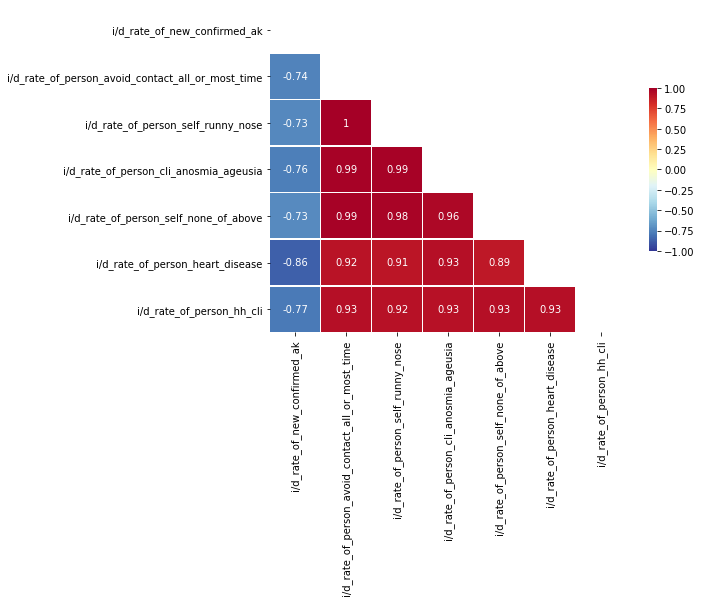

In [46]:
corr = ak_18_see.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )
figure = plt.gcf()
figure.set_size_inches(8, 6)
plt.savefig('ak_18.png', bbox_inches="tight")
plt.show()

In [47]:
"""x = date['date']
y_1 = ak_18_see['ak']
y_2 = ak_18_see['smoothed_pct_self_runny_nose']

plt.plot(x, y_1)
plt.plot(x, y_2)
plt.legend(['Increase/decrease num of new confirmed case counts', 'Increase/decrease num of the reply; smoothed_pct_self_runny_nose'])

plt.show()
"""

"x = date['date']\ny_1 = ak_18_see['ak']\ny_2 = ak_18_see['smoothed_pct_self_runny_nose']\n\nplt.plot(x, y_1)\nplt.plot(x, y_2)\nplt.legend(['Increase/decrease num of new confirmed case counts', 'Increase/decrease num of the reply; smoothed_pct_self_runny_nose'])\n\nplt.show()\n"

C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\sarah\anaconda3\lib\site-p

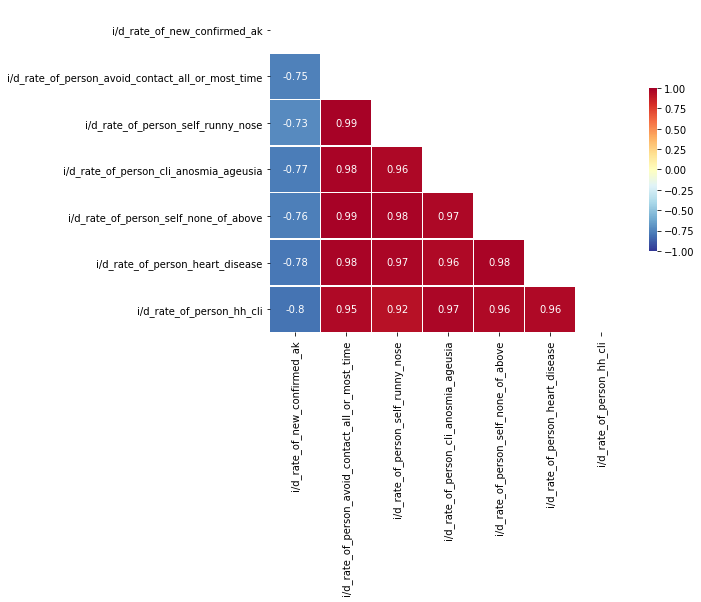

In [48]:
data_35 = data[data['age_bucket'] == '35-54'].reset_index()
data_35 = data_35.drop('index', axis = 1)
data_35.head(5)

data_unique = data['state_code'].unique()
#print(data_unique)

ak_35 = data_35[data_35['state_code'] == 'ak']
ak_35 = ak_35.sort_values(by = 'date', ascending = True).reset_index()

ak_35_concat = pd.concat([cases['ak'], ak_35], axis=1)
ak_35_concat

lst_1 = []
for i in ak_35_concat.columns:
    if "pct" not in i:
        lst_1.append(i)
        
#print(lst_1, '\n') 

del lst_1[0]
del lst_1[1]
del lst_1[4]

#print(lst_1)

ak_35_concat_drop = ak_35_concat.drop(lst_1, axis = 1) 
ak_35_concat_drop.head(5)
#print(ak_35_concat_drop.columns)

ak_35_concat_dropped = ak_35_concat_drop.drop(['ak','date', 'summed_n'], axis = 1)

for i in range(len(ak_35_concat_drop)):
    for j in ak_35_concat_dropped.columns:
        ak_35_concat_drop[j][i] = (ak_35_concat_drop[j][i]/100) * ak_35_concat_drop['summed_n'][i]

ak_35_see = ak_35_concat_drop[["ak", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

ak_35_tmp = ak_35_concat_drop[["ak", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

pop_num_div = 730

for i in ak_35_see.columns:
    #print(i)
    for j in range(len(ak_35_see[str(i)]) ):
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j] = float(ak_35_see[str(i)][j] / pop_num_div) * 100
        #print(ak_18_see[str(i)][j])
        
ak_35_see = ak_35_see
ak_35_tmp = ak_35_see

for i in ak_35_see.columns:
    for j in range(len(ak_35_see[str(i)]) - 1):
        ak_35_see[str(i)][j + 1] = ak_35_see[str(i)][j + 1] - ak_35_tmp[str(i)][j]     
        
ak_35_see = ak_35_see.iloc[1:]
ak_35_see

ak_35_see.columns = ['i/d_rate_of_new_confirmed_ak', 'i/d_rate_of_person_avoid_contact_all_or_most_time',
       'i/d_rate_of_person_self_runny_nose', 'i/d_rate_of_person_cli_anosmia_ageusia',
       'i/d_rate_of_person_self_none_of_above', 'i/d_rate_of_person_heart_disease',  'i/d_rate_of_person_hh_cli']

corr = ak_35_see.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )

figure = plt.gcf()
figure.set_size_inches(8, 6)
plt.savefig('ak_35.png', bbox_inches="tight")
plt.show()

C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


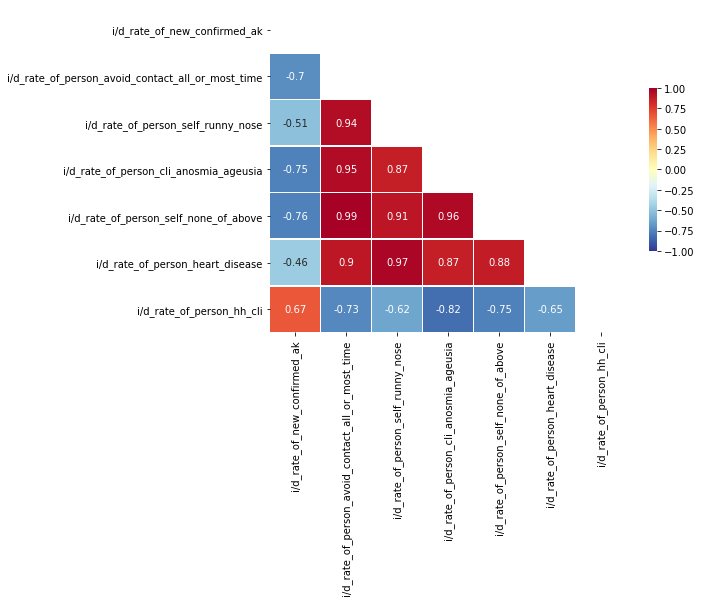

In [49]:
data_35 = data[data['age_bucket'] == '55+'].reset_index()
data_35 = data_35.drop('index', axis = 1)
data_35.head(5)

data_unique = data['state_code'].unique()
#print(data_unique)

ak_35 = data_35[data_35['state_code'] == 'ak']
ak_35 = ak_35.sort_values(by = 'date', ascending = True).reset_index()

ak_35_concat = pd.concat([cases['ak'], ak_35], axis=1)
ak_35_concat

lst_1 = []
for i in ak_35_concat.columns:
    if "pct" not in i:
        lst_1.append(i)
        
#print(lst_1, '\n') 

del lst_1[0]
del lst_1[1]
del lst_1[4]


ak_35_concat_drop = ak_35_concat.drop(lst_1, axis = 1) 
ak_35_concat_drop.head(5)

ak_35_concat_dropped = ak_35_concat_drop.drop(['ak','date', 'summed_n'], axis = 1)

for i in range(len(ak_35_concat_drop)):
    for j in ak_35_concat_dropped.columns:
        ak_35_concat_drop[j][i] = (ak_35_concat_drop[j][i]/100) * ak_35_concat_drop['summed_n'][i]

ak_35_see = ak_35_concat_drop[["ak", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

ak_35_tmp = ak_35_concat_drop[["ak", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

pop_num_div = 730

for i in ak_35_see.columns:
    #print(i)
    for j in range(len(ak_35_see[str(i)]) ):
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j] = float(ak_35_see[str(i)][j] / pop_num_div) * 100
        #print(ak_18_see[str(i)][j])
        
ak_35_see = ak_35_see
ak_35_tmp = ak_35_see

for i in ak_35_see.columns:
    for j in range(len(ak_35_see[str(i)]) - 1):
        #print(ak_18_see[str(i)][j + 1])
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j + 1] = ak_35_see[str(i)][j + 1] - ak_35_tmp[str(i)][j]     
        
ak_35_see = ak_35_see.iloc[1:]
ak_35_see

ak_35_see.columns = ['i/d_rate_of_new_confirmed_ak', 'i/d_rate_of_person_avoid_contact_all_or_most_time',
       'i/d_rate_of_person_self_runny_nose', 'i/d_rate_of_person_cli_anosmia_ageusia',
       'i/d_rate_of_person_self_none_of_above', 'i/d_rate_of_person_heart_disease',  'i/d_rate_of_person_hh_cli']

corr = ak_35_see.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )

figure = plt.gcf()
figure.set_size_inches(8, 6)
plt.savefig('ak_55.png', bbox_inches="tight")
plt.show()

# Wyoming / WY

C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


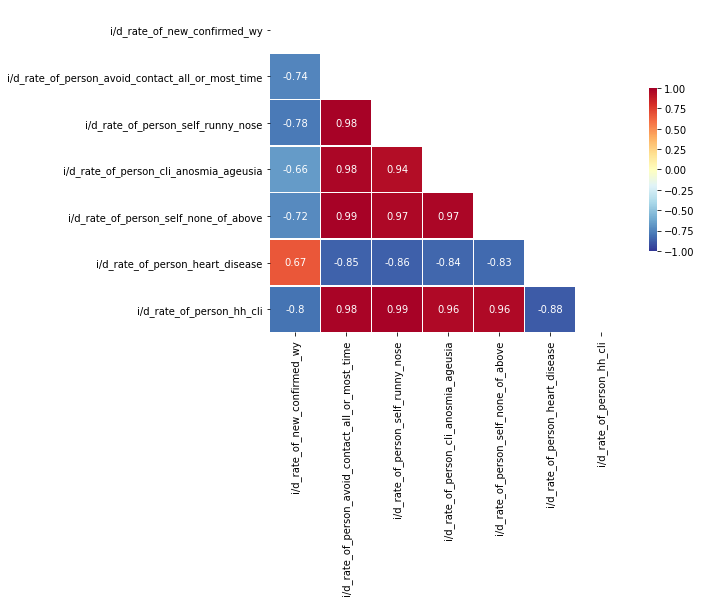

In [50]:
data_35 = data[data['age_bucket'] == '18-34'].reset_index()
data_35 = data_35.drop('index', axis = 1)
data_35.head(5)

data_unique = data['state_code'].unique()
#print(data_unique)

ak_35 = data_35[data_35['state_code'] == 'wy']
ak_35 = ak_35.sort_values(by = 'date', ascending = True).reset_index()

ak_35_concat = pd.concat([cases['wy'], ak_35], axis=1)
ak_35_concat

lst_1 = []
for i in ak_35_concat.columns:
    if "pct" not in i:
        lst_1.append(i)
        
#print(lst_1, '\n') 

del lst_1[0]
del lst_1[1]
del lst_1[4]

#print(lst_1)

ak_35_concat_drop = ak_35_concat.drop(lst_1, axis = 1) 
ak_35_concat_drop.head(5)
#print(ak_35_concat_drop.columns)

ak_35_concat_dropped = ak_35_concat_drop.drop(['wy','date', 'summed_n'], axis = 1)

for i in range(len(ak_35_concat_drop)):
    for j in ak_35_concat_dropped.columns:
        ak_35_concat_drop[j][i] = (ak_35_concat_drop[j][i]/100) * ak_35_concat_drop['summed_n'][i]

ak_35_see = ak_35_concat_drop[["wy", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

ak_35_tmp = ak_35_concat_drop[["wy", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

pop_num_div = 580

for i in ak_35_see.columns:
    #print(i)
    for j in range(len(ak_35_see[str(i)]) ):
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j] = float(ak_35_see[str(i)][j] / pop_num_div) * 100
        #print(ak_18_see[str(i)][j])
        
ak_35_see = ak_35_see
ak_35_tmp = ak_35_see

for i in ak_35_see.columns:
    for j in range(len(ak_35_see[str(i)]) - 1):
        #print(ak_18_see[str(i)][j + 1])
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j + 1] = ak_35_see[str(i)][j + 1] - ak_35_tmp[str(i)][j]     
        
ak_35_see = ak_35_see.iloc[1:]
ak_35_see

ak_35_see.columns = ['i/d_rate_of_new_confirmed_wy', 'i/d_rate_of_person_avoid_contact_all_or_most_time',
       'i/d_rate_of_person_self_runny_nose', 'i/d_rate_of_person_cli_anosmia_ageusia',
       'i/d_rate_of_person_self_none_of_above', 'i/d_rate_of_person_heart_disease',  'i/d_rate_of_person_hh_cli']

corr = ak_35_see.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )

figure = plt.gcf()
figure.set_size_inches(8, 6)
plt.savefig('wy_18.png', bbox_inches="tight")
plt.show()


Index(['wy', 'index', 'date', 'state_code', 'gender', 'age_bucket', 'summed_n',
       'smoothed_pct_cli', 'smoothed_pct_ili',
       'smoothed_pct_cli_anosmia_ageusia',
       ...
       'smoothed_pct_diabetes_weighted', 'smoothed_pct_cancer_weighted',
       'smoothed_pct_heart_disease_weighted',
       'smoothed_pct_high_blood_pressure_weighted',
       'smoothed_pct_asthma_weighted',
       'smoothed_pct_chronic_lung_disease_weighted',
       'smoothed_pct_kidney_disease_weighted',
       'smoothed_pct_autoimmune_disorder_weighted',
       'smoothed_pct_no_above_medical_conditions_weighted',
       'smoothed_pct_multiple_medical_conditions_weighted'],
      dtype='object', length=105)


C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Index(['wy', 'date', 'summed_n', 'smoothed_pct_cli', 'smoothed_pct_ili',
       'smoothed_pct_cli_anosmia_ageusia', 'smoothed_pct_hh_cli',
       'smoothed_pct_cmnty_cli', 'smoothed_pct_hh_fever',
       'smoothed_pct_hh_sore_throat', 'smoothed_pct_hh_cough',
       'smoothed_pct_hh_shortness_of_breath',
       'smoothed_pct_hh_difficulty_breathing', 'smoothed_pct_self_fever',
       'smoothed_pct_self_cough', 'smoothed_pct_self_shortness_of_breath',
       'smoothed_pct_self_difficulty_breathing',
       'smoothed_pct_self_tiredness_or_exhaustion',
       'smoothed_pct_self_nasal_congestion', 'smoothed_pct_self_runny_nose',
       'smoothed_pct_self_muscle_joint_aches', 'smoothed_pct_self_sore_throat',
       'smoothed_pct_self_persistent_pain_pressure_in_chest',
       'smoothed_pct_self_nausea_vomiting', 'smoothed_pct_self_diarrhea',
       'smoothed_pct_self_anosmia_ageusia', 'smoothed_pct_self_other',
       'smoothed_pct_self_none_of_above',
       'smoothed_pct_self_multiple_sym

C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


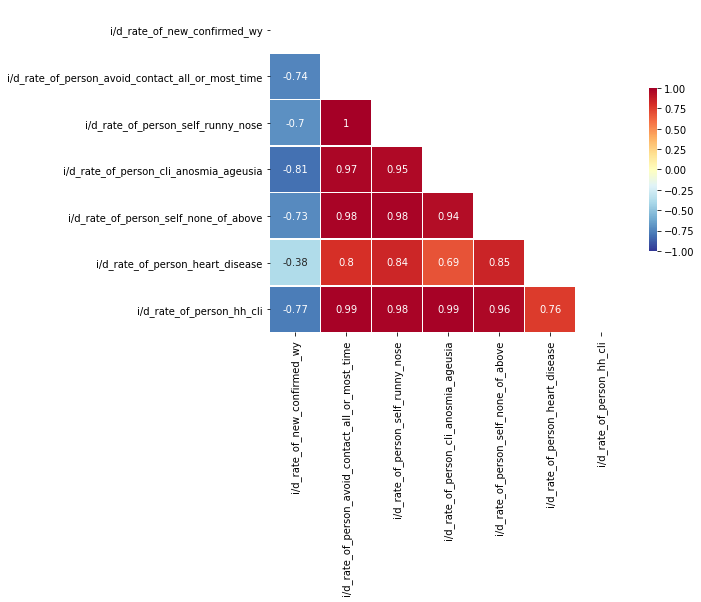

In [51]:
data_35 = data[data['age_bucket'] == '35-54'].reset_index()
data_35 = data_35.drop('index', axis = 1)
data_35.head(5)

data_unique = data['state_code'].unique()
#print(data_unique)

ak_35 = data_35[data_35['state_code'] == 'wy']
ak_35 = ak_35.sort_values(by = 'date', ascending = True).reset_index()

ak_35_concat = pd.concat([cases['wy'], ak_35], axis=1)
print(ak_35_concat.columns)

lst_1 = []
for i in ak_35_concat.columns:
    if "pct" not in i:
        lst_1.append(i)
        
#print(lst_1, '\n') 

del lst_1[0]
del lst_1[1]
del lst_1[4]

#print(lst_1)

ak_35_concat_drop = ak_35_concat.drop(lst_1, axis = 1) 
#print(ak_35_concat_drop.columns)

ak_35_concat_dropped = ak_35_concat_drop.drop(['wy','date', 'summed_n'], axis = 1)

for i in range(len(ak_35_concat_drop)):
    for j in ak_35_concat_dropped.columns:
        ak_35_concat_drop[j][i] = (ak_35_concat_drop[j][i]/100) * ak_35_concat_drop['summed_n'][i]
print(ak_35_concat_drop.columns)

ak_35_see = ak_35_concat_drop[["wy", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

ak_35_tmp = ak_35_concat_drop[["wy", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

pop_num_div = 580

for i in ak_35_see.columns:
    #print(i)
    for j in range(len(ak_35_see[str(i)]) ):
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j] = float(ak_35_see[str(i)][j] / pop_num_div) * 100
        #print(ak_18_see[str(i)][j])
        
ak_35_see = ak_35_see
ak_35_tmp = ak_35_see

for i in ak_35_see.columns:
    for j in range(len(ak_35_see[str(i)]) - 1):
        #print(ak_18_see[str(i)][j + 1])
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j + 1] = ak_35_see[str(i)][j + 1] - ak_35_tmp[str(i)][j]     
        
ak_35_see = ak_35_see.iloc[1:]
ak_35_see
ak_35_see.columns = ['i/d_rate_of_new_confirmed_wy', 'i/d_rate_of_person_avoid_contact_all_or_most_time',
       'i/d_rate_of_person_self_runny_nose', 'i/d_rate_of_person_cli_anosmia_ageusia',
       'i/d_rate_of_person_self_none_of_above', 'i/d_rate_of_person_heart_disease',  'i/d_rate_of_person_hh_cli']
corr = ak_35_see.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )

figure = plt.gcf()
figure.set_size_inches(8, 6)
plt.savefig('wy_35.png', bbox_inches="tight")
plt.show()



C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


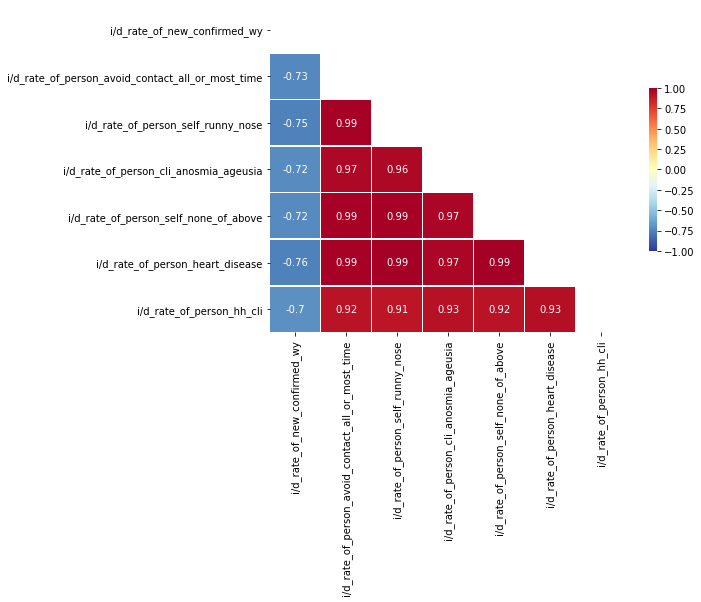

In [52]:
data_35 = data[data['age_bucket'] == '55+'].reset_index()
data_35 = data_35.drop('index', axis = 1)
data_35.head(5)

data_unique = data['state_code'].unique()
#print(data_unique)

ak_35 = data_35[data_35['state_code'] == 'wy']
ak_35 = ak_35.sort_values(by = 'date', ascending = True).reset_index()

ak_35_concat = pd.concat([cases['wy'], ak_35], axis=1)
ak_35_concat

lst_1 = []
for i in ak_35_concat.columns:
    if "pct" not in i:
        lst_1.append(i)
        
#print(lst_1, '\n') 

del lst_1[0]
del lst_1[1]
del lst_1[4]

#print(lst_1)

ak_35_concat_drop = ak_35_concat.drop(lst_1, axis = 1) 
ak_35_concat_drop.head(5)
#print(ak_35_concat_drop.columns)

ak_35_concat_dropped = ak_35_concat_drop.drop(['wy','date', 'summed_n'], axis = 1)

for i in range(len(ak_35_concat_drop)):
    for j in ak_35_concat_dropped.columns:
        ak_35_concat_drop[j][i] = (ak_35_concat_drop[j][i]/100) * ak_35_concat_drop['summed_n'][i]
        
ak_35_see = ak_35_concat_drop[["wy", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

ak_35_tmp = ak_35_concat_drop[["wy", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

pop_num_div = 580

for i in ak_35_see.columns:
    #print(i)
    for j in range(len(ak_35_see[str(i)]) ):
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j] = float(ak_35_see[str(i)][j] / pop_num_div) * 100
        #print(ak_18_see[str(i)][j])
        
ak_35_see = ak_35_see
ak_35_tmp = ak_35_see

for i in ak_35_see.columns:
    for j in range(len(ak_35_see[str(i)]) - 1):
        #print(ak_18_see[str(i)][j + 1])
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j + 1] = ak_35_see[str(i)][j + 1] - ak_35_tmp[str(i)][j]     
        
ak_35_see = ak_35_see.iloc[1:]
ak_35_see

ak_35_see.columns = ['i/d_rate_of_new_confirmed_wy', 'i/d_rate_of_person_avoid_contact_all_or_most_time',
       'i/d_rate_of_person_self_runny_nose', 'i/d_rate_of_person_cli_anosmia_ageusia',
       'i/d_rate_of_person_self_none_of_above', 'i/d_rate_of_person_heart_disease',  'i/d_rate_of_person_hh_cli']

corr = ak_35_see.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )

figure = plt.gcf()
figure.set_size_inches(8, 6)
plt.savefig('wy_55.png', bbox_inches="tight")
plt.show()


# Montana / MT

C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


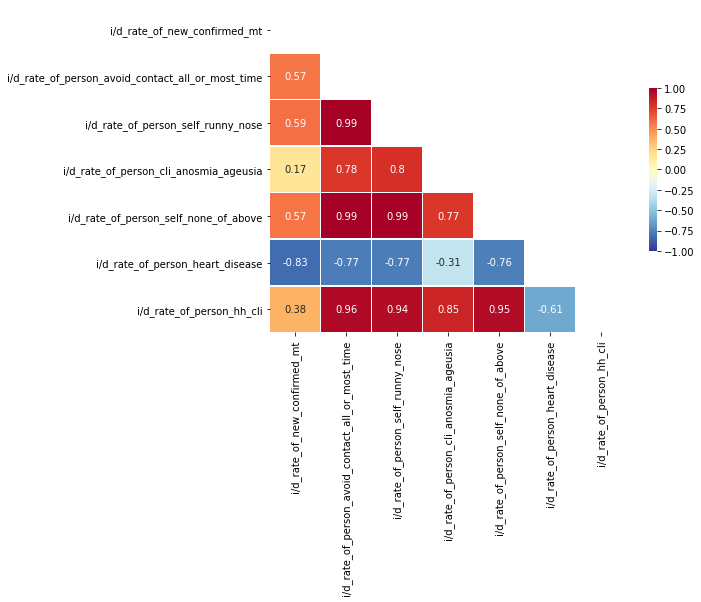

In [53]:
data_35 = data[data['age_bucket'] == '18-34'].reset_index()
data_35 = data_35.drop('index', axis = 1)
data_35.head(5)

data_unique = data['state_code'].unique()
#print(data_unique)

ak_35 = data_35[data_35['state_code'] == 'mt']
ak_35 = ak_35.sort_values(by = 'date', ascending = True).reset_index()

ak_35_concat = pd.concat([cases['mt'], ak_35], axis=1)
ak_35_concat

lst_1 = []
for i in ak_35_concat.columns:
    if "pct" not in i:
        lst_1.append(i)
        
#print(lst_1, '\n') 

del lst_1[0]
del lst_1[1]
del lst_1[4]

#print(lst_1)

ak_35_concat_drop = ak_35_concat.drop(lst_1, axis = 1) 
ak_35_concat_drop.head(5)
#print(ak_35_concat_drop.columns)

ak_35_concat_dropped = ak_35_concat_drop.drop(['mt','date', 'summed_n'], axis = 1)

for i in range(len(ak_35_concat_drop)):
    for j in ak_35_concat_dropped.columns:
        ak_35_concat_drop[j][i] = (ak_35_concat_drop[j][i]/100) * ak_35_concat_drop['summed_n'][i]
        
ak_35_see = ak_35_concat_drop[["mt", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

ak_35_tmp = ak_35_concat_drop[["mt", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

pop_num_div = 1070

for i in ak_35_see.columns:
    #print(i)
    for j in range(len(ak_35_see[str(i)]) ):
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j] = float(ak_35_see[str(i)][j] / pop_num_div) * 100
        #print(ak_18_see[str(i)][j])
        
ak_35_see = ak_35_see
ak_35_tmp = ak_35_see

for i in ak_35_see.columns:
    for j in range(len(ak_35_see[str(i)]) - 1):
        #print(ak_18_see[str(i)][j + 1])
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j + 1] = ak_35_see[str(i)][j + 1] - ak_35_tmp[str(i)][j]     
        
ak_35_see = ak_35_see.iloc[1:]

ak_35_see.columns = ['i/d_rate_of_new_confirmed_mt', 'i/d_rate_of_person_avoid_contact_all_or_most_time',
       'i/d_rate_of_person_self_runny_nose', 'i/d_rate_of_person_cli_anosmia_ageusia',
       'i/d_rate_of_person_self_none_of_above', 'i/d_rate_of_person_heart_disease',  'i/d_rate_of_person_hh_cli']

corr = ak_35_see.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )
figure = plt.gcf()
figure.set_size_inches(8, 6)
plt.savefig('mt_18.png', bbox_inches="tight")
plt.show()



C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


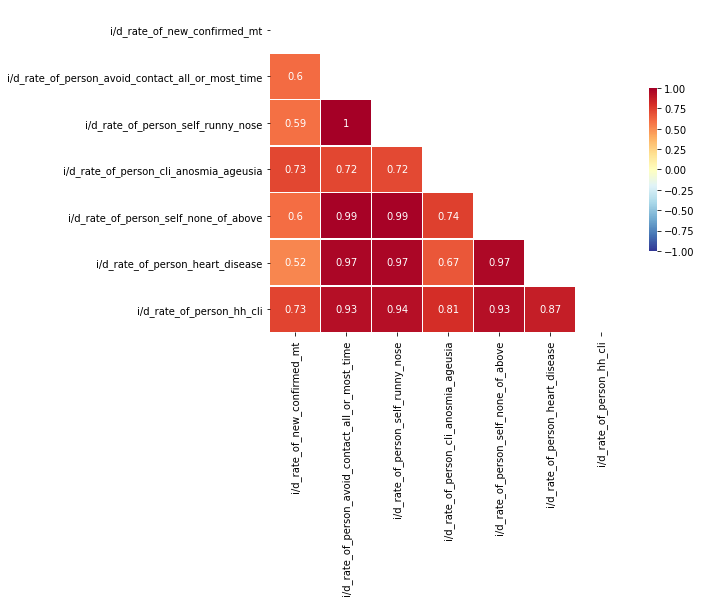

In [54]:
data_35 = data[data['age_bucket'] == '35-54'].reset_index()
data_35 = data_35.drop('index', axis = 1)
data_35.head(5)

data_unique = data['state_code'].unique()
#print(data_unique)

ak_35 = data_35[data_35['state_code'] == 'mt']
ak_35 = ak_35.sort_values(by = 'date', ascending = True).reset_index()

ak_35_concat = pd.concat([cases['mt'], ak_35], axis=1)
ak_35_concat

lst_1 = []
for i in ak_35_concat.columns:
    if "pct" not in i:
        lst_1.append(i)
        
#print(lst_1, '\n') 

del lst_1[0]
del lst_1[1]
del lst_1[4]

#print(lst_1)

ak_35_concat_drop = ak_35_concat.drop(lst_1, axis = 1) 
ak_35_concat_drop.head(5)
#print(ak_35_concat_drop.columns)

ak_35_concat_dropped = ak_35_concat_drop.drop(['mt','date', 'summed_n'], axis = 1)

for i in range(len(ak_35_concat_drop)):
    for j in ak_35_concat_dropped.columns:
        ak_35_concat_drop[j][i] = (ak_35_concat_drop[j][i]/100) * ak_35_concat_drop['summed_n'][i]
        
ak_35_see = ak_35_concat_drop[["mt", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

ak_35_tmp = ak_35_concat_drop[["mt", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

pop_num_div = 1070

for i in ak_35_see.columns:
    #print(i)
    for j in range(len(ak_35_see[str(i)]) ):
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j] = float(ak_35_see[str(i)][j] / pop_num_div) * 100
        #print(ak_18_see[str(i)][j])
        
ak_35_see = ak_35_see
ak_35_tmp = ak_35_see

for i in ak_35_see.columns:
    for j in range(len(ak_35_see[str(i)]) - 1):
        #print(ak_18_see[str(i)][j + 1])
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j + 1] = ak_35_see[str(i)][j + 1] - ak_35_tmp[str(i)][j]     
        
ak_35_see = ak_35_see.iloc[1:]
ak_35_see

ak_35_see.columns = ['i/d_rate_of_new_confirmed_mt', 'i/d_rate_of_person_avoid_contact_all_or_most_time',
       'i/d_rate_of_person_self_runny_nose', 'i/d_rate_of_person_cli_anosmia_ageusia',
       'i/d_rate_of_person_self_none_of_above', 'i/d_rate_of_person_heart_disease',  'i/d_rate_of_person_hh_cli']

corr = ak_35_see.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )
figure = plt.gcf()
figure.set_size_inches(8, 6)
plt.savefig('mt_35.png', bbox_inches="tight")
plt.show()



C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


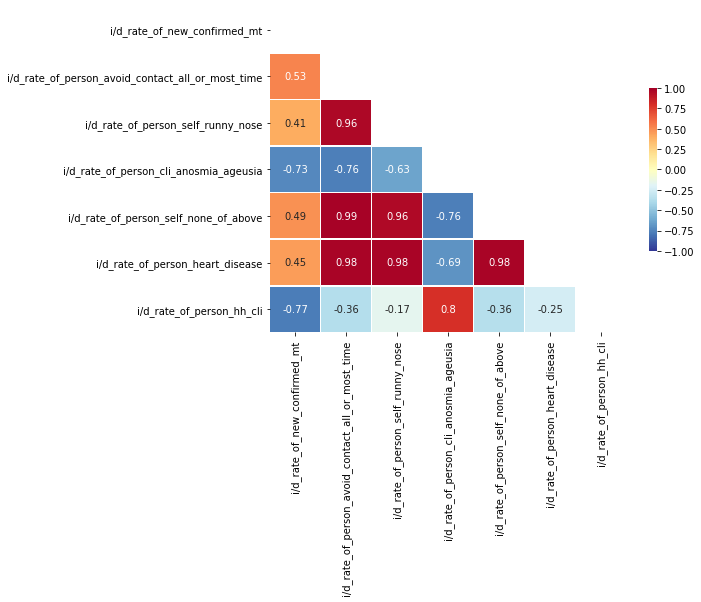

In [55]:
data_35 = data[data['age_bucket'] == '55+'].reset_index()
data_35 = data_35.drop('index', axis = 1)
data_35.head(5)

data_unique = data['state_code'].unique()
#print(data_unique)

ak_35 = data_35[data_35['state_code'] == 'mt']
ak_35 = ak_35.sort_values(by = 'date', ascending = True).reset_index()

ak_35_concat = pd.concat([cases['mt'], ak_35], axis=1)
ak_35_concat

lst_1 = []
for i in ak_35_concat.columns:
    if "pct" not in i:
        lst_1.append(i)
        
#print(lst_1, '\n') 

del lst_1[0]
del lst_1[1]
del lst_1[4]

#print(lst_1)

ak_35_concat_drop = ak_35_concat.drop(lst_1, axis = 1) 
ak_35_concat_drop.head(5)
#print(ak_35_concat_drop.columns)

ak_35_concat_dropped = ak_35_concat_drop.drop(['mt','date', 'summed_n'], axis = 1)

for i in range(len(ak_35_concat_drop)):
    for j in ak_35_concat_dropped.columns:
        ak_35_concat_drop[j][i] = (ak_35_concat_drop[j][i]/100) * ak_35_concat_drop['summed_n'][i]

ak_35_see = ak_35_concat_drop[["mt", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

ak_35_tmp = ak_35_concat_drop[["mt", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

pop_num_div = 1070

for i in ak_35_see.columns:
    #print(i)
    for j in range(len(ak_35_see[str(i)]) ):
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j] = float(ak_35_see[str(i)][j] / pop_num_div) * 100
        #print(ak_18_see[str(i)][j])
        
ak_35_see = ak_35_see
ak_35_tmp = ak_35_see

for i in ak_35_see.columns:
    for j in range(len(ak_35_see[str(i)]) - 1):
        #print(ak_18_see[str(i)][j + 1])
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j + 1] = ak_35_see[str(i)][j + 1] - ak_35_tmp[str(i)][j]     
        
ak_35_see = ak_35_see.iloc[1:]
ak_35_see

ak_35_see.columns = ['i/d_rate_of_new_confirmed_mt', 'i/d_rate_of_person_avoid_contact_all_or_most_time',
       'i/d_rate_of_person_self_runny_nose', 'i/d_rate_of_person_cli_anosmia_ageusia',
       'i/d_rate_of_person_self_none_of_above', 'i/d_rate_of_person_heart_disease',  'i/d_rate_of_person_hh_cli']

corr = ak_35_see.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )

figure = plt.gcf()
figure.set_size_inches(8, 6)
plt.savefig('mt_55.png', bbox_inches="tight")
plt.show()



# District of Columbia / DC

In [62]:
data_unique = data['state_code'].unique()
#print(data_unique)

ak_overall = data_overall[data_overall['state_code'] == 'dc']
ak_overall = ak_overall.sort_values(by = 'date', ascending = True).reset_index()

cases_ak = pd.concat([cases['dc'], ak_overall], axis=1)
cases_ak


lst_1 = []
for i in cases_ak.columns:
    if "pct" not in i:
        lst_1.append(i)
        
print(lst_1, '\n') 

del lst_1[0]
del lst_1[1]
del lst_1[4]

print(lst_1)

cases_ak_drop = cases_ak.drop(lst_1, axis = 1) 
cases_ak_drop.head(5)
#print(cases_ak_drop.columns)

lst_2 = []

j = ""
for j in cases_ak_drop.columns:
    if "weighted" in j:
        lst_2.append(j)
        
#print(lst_2)

cases_ak_drop = cases_ak_drop.drop(lst_2, axis = 1) 
cases_ak_drop.head(5)

print(cases_ak_drop.columns)

cases_ak_dropped = cases_ak_drop.drop(['dc','date', 'summed_n'], axis = 1)


i = 0
j = ''
for i in range(len(cases_ak_drop)):
    for j in cases_ak_dropped.columns:
        cases_ak_drop[j][i] = (cases_ak_drop[j][i]/100) * cases_ak_drop['summed_n'][i]
        
cases_ak_drop

# define dataset
label = np.array(cases_ak_drop['dc'])
features = cases_ak_drop.drop(['dc', 'date', 'summed_n'], axis = 1)

feature_list = list(features.columns)

features = np.array(features)

# min-max scale
minmax_scale(features)

# define the model
model = RandomForestRegressor()
# fit the model
model.fit(features, label)
# get importance
importance = model.feature_importances_

key = []
value = []

for i,v in enumerate(importance):
    key.append(i)
    value.append(v)

rf = dict(zip(key, value))
rf = sorted(rf.items(), key=lambda x: x[1], reverse=True)[:10]
print(rf)

lst = []

for i in rf:
    #print(i[0])
    print(feature_list[i[0]])
    lst

['dc', 'index', 'date', 'state_code', 'gender', 'age_bucket', 'summed_n', 'smoothed_mean_hh_cli_ct', 'smoothed_mean_cmnty_cli_ct', 'smoothed_mean_outside_hh_contact_at_work_ct', 'smoothed_mean_outside_hh_contact_shopping_ct', 'smoothed_mean_outside_hh_contact_in_social_gatherings_ct', 'smoothed_mean_hh_cli_ct_weighted', 'smoothed_mean_cmnty_cli_ct_weighted', 'smoothed_mean_outside_hh_contact_at_work_ct_weighted', 'smoothed_mean_outside_hh_contact_shopping_ct_weighted', 'smoothed_mean_outside_hh_contact_in_social_gatherings_ct_weighted'] 

['index', 'state_code', 'gender', 'age_bucket', 'smoothed_mean_hh_cli_ct', 'smoothed_mean_cmnty_cli_ct', 'smoothed_mean_outside_hh_contact_at_work_ct', 'smoothed_mean_outside_hh_contact_shopping_ct', 'smoothed_mean_outside_hh_contact_in_social_gatherings_ct', 'smoothed_mean_hh_cli_ct_weighted', 'smoothed_mean_cmnty_cli_ct_weighted', 'smoothed_mean_outside_hh_contact_at_work_ct_weighted', 'smoothed_mean_outside_hh_contact_shopping_ct_weighted', 'smooth

C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[(28, 0.31520559695441386), (24, 0.1396751554360245), (36, 0.06905129538748317), (16, 0.043783395428842464), (27, 0.03392912726623681), (3, 0.02735195554643865), (22, 0.02504974079717952), (43, 0.022940014950830565), (32, 0.02204659634299289), (35, 0.018931186986117038)]
smoothed_pct_tested_no_result
smoothed_pct_self_none_of_above
smoothed_pct_heart_disease
smoothed_pct_self_runny_nose
smoothed_pct_tested_and_negative
smoothed_pct_hh_cli
smoothed_pct_self_anosmia_ageusia
smoothed_pct_multiple_medical_conditions
smoothed_pct_avoid_contact_all_or_most_time
smoothed_pct_cancer


C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\sarah\anaconda3\lib\site-p

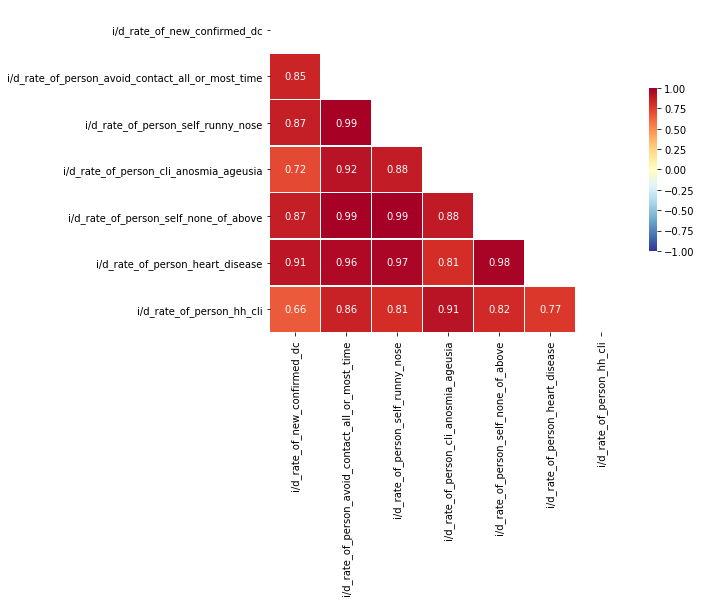

In [81]:
data_35 = data[data['age_bucket'] == '18-34'].reset_index()
data_35 = data_35.drop('index', axis = 1)
data_35.head(5)

data_unique = data['state_code'].unique()
#print(data_unique)

ak_35 = data_35[data_35['state_code'] == 'dc']
ak_35 = ak_35.sort_values(by = 'date', ascending = True).reset_index()

ak_35_concat = pd.concat([cases['dc'], ak_35], axis=1)
ak_35_concat

lst_1 = []
for i in ak_35_concat.columns:
    if "pct" not in i:
        lst_1.append(i)
        
#print(lst_1, '\n') 

del lst_1[0]
del lst_1[1]
del lst_1[4]

#print(lst_1)

ak_35_concat_drop = ak_35_concat.drop(lst_1, axis = 1) 
ak_35_concat_drop.head(5)
#print(ak_35_concat_drop.columns)

ak_35_concat_dropped = ak_35_concat_drop.drop(['dc','date', 'summed_n'], axis = 1)

for i in range(len(ak_35_concat_drop)):
    for j in ak_35_concat_dropped.columns:
        ak_35_concat_drop[j][i] = (ak_35_concat_drop[j][i]/100) * ak_35_concat_drop['summed_n'][i]

ak_35_see = ak_35_concat_drop[["dc", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

ak_35_tmp = ak_35_concat_drop[["dc", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

pop_num_div = 710

for i in ak_35_see.columns:
    #print(i)
    for j in range(len(ak_35_see[str(i)]) ):
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j] = float(ak_35_see[str(i)][j] / pop_num_div) * 100
        #print(ak_18_see[str(i)][j])
        
ak_35_see = ak_35_see
ak_35_tmp = ak_35_see

for i in ak_35_see.columns:
    for j in range(len(ak_35_see[str(i)]) - 1):
        #print(ak_18_see[str(i)][j + 1])
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j + 1] = ak_35_see[str(i)][j + 1] - ak_35_tmp[str(i)][j]     
        
ak_35_see = ak_35_see.iloc[1:]
ak_35_see
ak_35_see.columns = ['i/d_rate_of_new_confirmed_dc', 'i/d_rate_of_person_avoid_contact_all_or_most_time',
       'i/d_rate_of_person_self_runny_nose', 'i/d_rate_of_person_cli_anosmia_ageusia',
       'i/d_rate_of_person_self_none_of_above', 'i/d_rate_of_person_heart_disease',  'i/d_rate_of_person_hh_cli']

corr = ak_35_see.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )
figure = plt.gcf()
figure.set_size_inches(8, 6)
plt.savefig('dc_18.png', bbox_inches="tight")

plt.show()



In [82]:
"""lagged_correlation = pd.DataFrame.from_dict(
    {x: [ak_35_see['i/d_rate_of_new_confirmed_dc'].corr(ak_35_see[x].shift(-t)) for t in range(20)] for x in ak_35_see.columns})
lagged_correlation"""

,i/d_rate_of_new_confirmed_dc,i/d_rate_of_person_avoid_contact_all_or_most_time,i/d_rate_of_person_self_runny_nose,i/d_rate_of_person_cli_anosmia_ageusia,i/d_rate_of_person_self_none_of_above,i/d_rate_of_person_heart_disease,i/d_rate_of_person_hh_cli
0,1.000000,0.850432,0.873761,0.717942,0.869445,0.906287,0.660060
1,-0.956027,-0.839438,-0.865837,-0.705576,-0.876297,-0.912234,-0.656424
2,0.969804,0.853012,0.877089,0.719366,0.869158,0.906038,0.663703
3,-0.925909,-0.843351,-0.870218,-0.710148,-0.877459,-0.912067,-0.661534
4,0.934035,0.853656,0.878859,0.722839,0.867978,0.904459,0.667393
5,-0.892053,-0.843603,-0.871950,-0.711289,-0.876467,-0.909738,-0.661841
6,0.911067,0.853247,0.880710,0.720501,0.867128,0.901785,0.664383
7,-0.872275,-0.842722,-0.873901,-0.709262,-0.875112,-0.905598,-0.658950
8,0.895559,0.852944,0.882381,0.717431,0.866902,0.898839,0.660470
9,-0.863167,-0.842446,-0.875101,-0.704604,-0.874634,-0.903113,-0.655853


C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


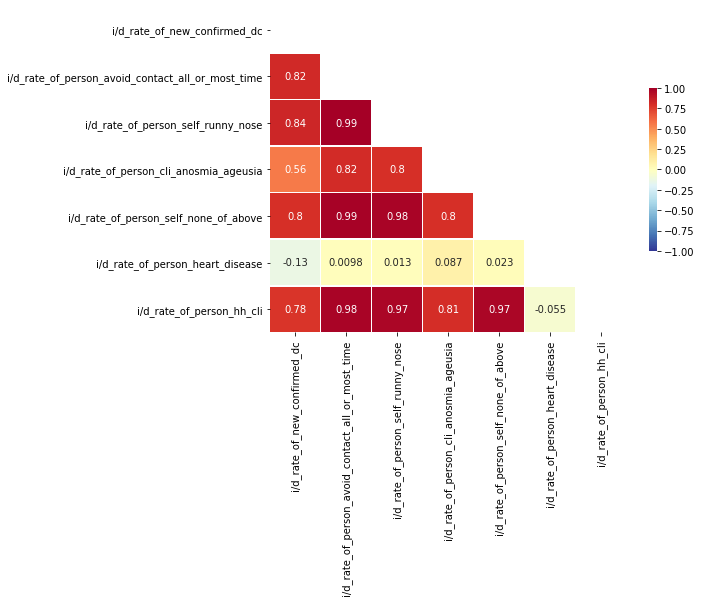

In [64]:
data_35 = data[data['age_bucket'] == '35-54'].reset_index()
data_35 = data_35.drop('index', axis = 1)
data_35.head(5)

data_unique = data['state_code'].unique()
#print(data_unique)

ak_35 = data_35[data_35['state_code'] == 'dc']
ak_35 = ak_35.sort_values(by = 'date', ascending = True).reset_index()

ak_35_concat = pd.concat([cases['dc'], ak_35], axis=1)
ak_35_concat

lst_1 = []
for i in ak_35_concat.columns:
    if "pct" not in i:
        lst_1.append(i)
        
#print(lst_1, '\n') 

del lst_1[0]
del lst_1[1]
del lst_1[4]

#print(lst_1)

ak_35_concat_drop = ak_35_concat.drop(lst_1, axis = 1) 
ak_35_concat_drop.head(5)
#print(ak_35_concat_drop.columns)

ak_35_concat_dropped = ak_35_concat_drop.drop(['dc','date', 'summed_n'], axis = 1)

for i in range(len(ak_35_concat_drop)):
    for j in ak_35_concat_dropped.columns:
        ak_35_concat_drop[j][i] = (ak_35_concat_drop[j][i]/100) * ak_35_concat_drop['summed_n'][i]

ak_35_see = ak_35_concat_drop[["dc", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

ak_35_tmp = ak_35_concat_drop[["dc", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

pop_num_div = 710

for i in ak_35_see.columns:
    #print(i)
    for j in range(len(ak_35_see[str(i)]) ):
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j] = float(ak_35_see[str(i)][j] / pop_num_div) * 100
        #print(ak_18_see[str(i)][j])
        
ak_35_see = ak_35_see
ak_35_tmp = ak_35_see

for i in ak_35_see.columns:
    for j in range(len(ak_35_see[str(i)]) - 1):
        #print(ak_18_see[str(i)][j + 1])
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j + 1] = ak_35_see[str(i)][j + 1] - ak_35_tmp[str(i)][j]     
        
ak_35_see = ak_35_see.iloc[1:]

ak_35_see.columns = ['i/d_rate_of_new_confirmed_dc', 'i/d_rate_of_person_avoid_contact_all_or_most_time',
       'i/d_rate_of_person_self_runny_nose', 'i/d_rate_of_person_cli_anosmia_ageusia',
       'i/d_rate_of_person_self_none_of_above', 'i/d_rate_of_person_heart_disease',  'i/d_rate_of_person_hh_cli']

corr = ak_35_see.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )
figure = plt.gcf()
figure.set_size_inches(8, 6)
plt.savefig('dc_35.png', bbox_inches="tight")

plt.show()



C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


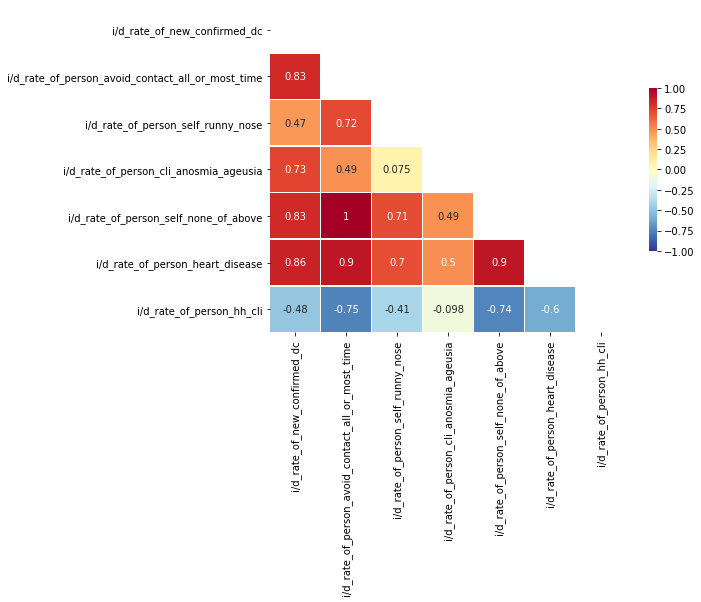

In [65]:
data_35 = data[data['age_bucket'] == '55+'].reset_index()
data_35 = data_35.drop('index', axis = 1)
data_35.head(5)

data_unique = data['state_code'].unique()
#print(data_unique)

ak_35 = data_35[data_35['state_code'] == 'dc']
ak_35 = ak_35.sort_values(by = 'date', ascending = True).reset_index()

ak_35_concat = pd.concat([cases['dc'], ak_35], axis=1)
ak_35_concat

lst_1 = []
for i in ak_35_concat.columns:
    if "pct" not in i:
        lst_1.append(i)
        
#print(lst_1, '\n') 

del lst_1[0]
del lst_1[1]
del lst_1[4]

#print(lst_1)

ak_35_concat_drop = ak_35_concat.drop(lst_1, axis = 1) 
ak_35_concat_drop.head(5)
#print(ak_35_concat_drop.columns)

ak_35_concat_dropped = ak_35_concat_drop.drop(['dc','date', 'summed_n'], axis = 1)

for i in range(len(ak_35_concat_drop)):
    for j in ak_35_concat_dropped.columns:
        ak_35_concat_drop[j][i] = (ak_35_concat_drop[j][i]/100) * ak_35_concat_drop['summed_n'][i]

ak_35_see = ak_35_concat_drop[["dc", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

ak_35_tmp = ak_35_concat_drop[["dc", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

pop_num_div = 710

for i in ak_35_see.columns:
    #print(i)
    for j in range(len(ak_35_see[str(i)]) ):
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j] = float(ak_35_see[str(i)][j] / pop_num_div) * 100
        #print(ak_18_see[str(i)][j])
        
ak_35_see = ak_35_see
ak_35_tmp = ak_35_see

for i in ak_35_see.columns:
    for j in range(len(ak_35_see[str(i)]) - 1):
        #print(ak_18_see[str(i)][j + 1])
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j + 1] = ak_35_see[str(i)][j + 1] - ak_35_tmp[str(i)][j]     
        
ak_35_see = ak_35_see.iloc[1:]
ak_35_see

ak_35_see.columns = ['i/d_rate_of_new_confirmed_dc', 'i/d_rate_of_person_avoid_contact_all_or_most_time',
       'i/d_rate_of_person_self_runny_nose', 'i/d_rate_of_person_cli_anosmia_ageusia',
       'i/d_rate_of_person_self_none_of_above', 'i/d_rate_of_person_heart_disease',  'i/d_rate_of_person_hh_cli']

corr = ak_35_see.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )
figure = plt.gcf()
figure.set_size_inches(8, 6)
plt.savefig('dc_55.png', bbox_inches="tight")

plt.show()



# New Jersey / NJ

C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\sarah\anaconda3\lib\site-p

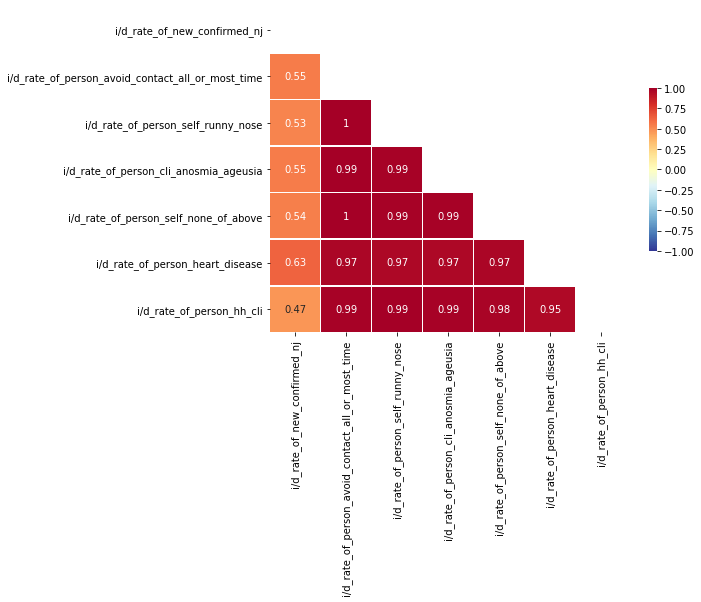

In [89]:
data_35 = data[data['age_bucket'] == '18-34'].reset_index()
data_35 = data_35.drop('index', axis = 1)
data_35.head(5)

data_unique = data['state_code'].unique()
#print(data_unique)

ak_35 = data_35[data_35['state_code'] == 'nj']
ak_35 = ak_35.sort_values(by = 'date', ascending = True).reset_index()

ak_35_concat = pd.concat([cases['nj'], ak_35], axis=1)
ak_35_concat

lst_1 = []
for i in ak_35_concat.columns:
    if "pct" not in i:
        lst_1.append(i)
        
#print(lst_1, '\n') 

del lst_1[0]
del lst_1[1]
del lst_1[4]

#print(lst_1)

ak_35_concat_drop = ak_35_concat.drop(lst_1, axis = 1) 
ak_35_concat_drop.head(5)
#print(ak_35_concat_drop.columns)

ak_35_concat_dropped = ak_35_concat_drop.drop(['nj','date', 'summed_n'], axis = 1)

for i in range(len(ak_35_concat_drop)):
    for j in ak_35_concat_dropped.columns:
        ak_35_concat_drop[j][i] = (ak_35_concat_drop[j][i]/100) * ak_35_concat_drop['summed_n'][i]

ak_35_see = ak_35_concat_drop[["nj", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

ak_35_tmp = ak_35_concat_drop[["nj", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

pop_num_div = 8880

for i in ak_35_see.columns:
    #print(i)
    for j in range(len(ak_35_see[str(i)]) ):
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j] = float(ak_35_see[str(i)][j] / pop_num_div) * 100
        #print(ak_18_see[str(i)][j])
        
ak_35_see = ak_35_see
ak_35_tmp = ak_35_see

for i in ak_35_see.columns:
    for j in range(len(ak_35_see[str(i)]) - 1):
        #print(ak_18_see[str(i)][j + 1])
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j + 1] = ak_35_see[str(i)][j + 1] - ak_35_tmp[str(i)][j]     
        
ak_35_see = ak_35_see.iloc[1:]
ak_35_see

ak_35_see.columns = ['i/d_rate_of_new_confirmed_nj', 'i/d_rate_of_person_avoid_contact_all_or_most_time',
       'i/d_rate_of_person_self_runny_nose', 'i/d_rate_of_person_cli_anosmia_ageusia',
       'i/d_rate_of_person_self_none_of_above', 'i/d_rate_of_person_heart_disease',  'i/d_rate_of_person_hh_cli']

corr = ak_35_see.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )

figure = plt.gcf()
figure.set_size_inches(8, 6)
plt.savefig('nj_18.png', bbox_inches="tight")


plt.show()



In [80]:
lagged_correlation = pd.DataFrame.from_dict(
    {x: [ak_35_see['i/d_rate_of_new_confirmed_nj'].corr(ak_35_see[x].shift(-t)) for t in range(20)] for x in ak_35_see.columns})
lagged_correlation

,i/d_rate_of_new_confirmed_nj,i/d_rate_of_person_avoid_contact_all_or_most_time,i/d_rate_of_person_self_runny_nose,i/d_rate_of_person_cli_anosmia_ageusia,i/d_rate_of_person_self_none_of_above,i/d_rate_of_person_heart_disease,i/d_rate_of_person_hh_cli
0,1.000000,0.554097,0.530958,0.552407,0.541513,0.625704,0.473949
1,-0.848443,-0.510614,-0.488079,-0.512232,-0.537985,-0.622172,-0.446023
2,0.968708,0.559055,0.534199,0.558344,0.547218,0.626519,0.479767
3,-0.806755,-0.516051,-0.491935,-0.521536,-0.543558,-0.621743,-0.452735
4,0.936524,0.565969,0.539895,0.565429,0.555326,0.627430,0.486569
5,-0.780677,-0.521883,-0.496622,-0.531870,-0.549609,-0.620482,-0.460563
6,0.915273,0.572642,0.545800,0.572526,0.563188,0.629074,0.492686
7,-0.754231,-0.528538,-0.502257,-0.543026,-0.556476,-0.620170,-0.468597
8,0.892496,0.580788,0.552639,0.581410,0.572904,0.630214,0.499230
9,-0.746297,-0.534243,-0.506970,-0.553231,-0.562466,-0.613615,-0.476536


C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


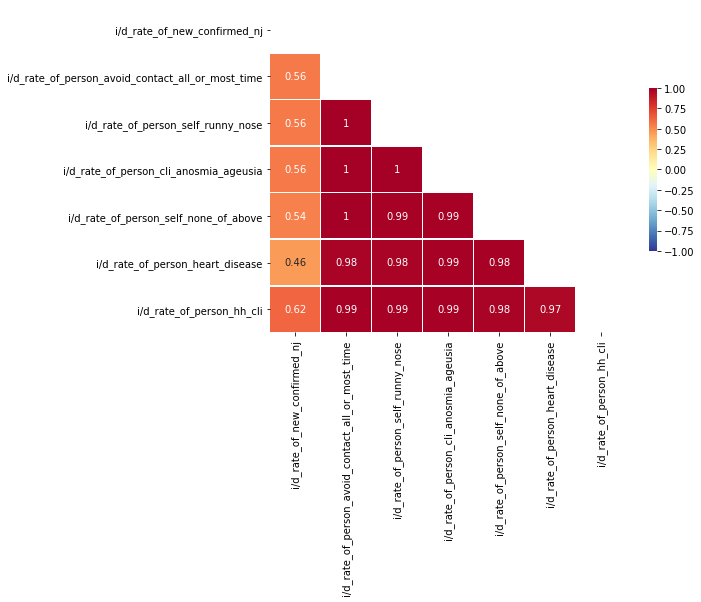

In [67]:
data_35 = data[data['age_bucket'] == '35-54'].reset_index()
data_35 = data_35.drop('index', axis = 1)
data_35.head(5)

data_unique = data['state_code'].unique()
#print(data_unique)

ak_35 = data_35[data_35['state_code'] == 'nj']
ak_35 = ak_35.sort_values(by = 'date', ascending = True).reset_index()

ak_35_concat = pd.concat([cases['nj'], ak_35], axis=1)
ak_35_concat

lst_1 = []
for i in ak_35_concat.columns:
    if "pct" not in i:
        lst_1.append(i)
        
#print(lst_1, '\n') 

del lst_1[0]
del lst_1[1]
del lst_1[4]

#print(lst_1)

ak_35_concat_drop = ak_35_concat.drop(lst_1, axis = 1) 
ak_35_concat_drop.head(5)
#print(ak_35_concat_drop.columns)

ak_35_concat_dropped = ak_35_concat_drop.drop(['nj','date', 'summed_n'], axis = 1)

for i in range(len(ak_35_concat_drop)):
    for j in ak_35_concat_dropped.columns:
        ak_35_concat_drop[j][i] = (ak_35_concat_drop[j][i]/100) * ak_35_concat_drop['summed_n'][i]

ak_35_see = ak_35_concat_drop[["nj", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

ak_35_tmp = ak_35_concat_drop[["nj", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

pop_num_div = 8880

for i in ak_35_see.columns:
    #print(i)
    for j in range(len(ak_35_see[str(i)]) ):
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j] = float(ak_35_see[str(i)][j] / pop_num_div) * 100
        #print(ak_18_see[str(i)][j])
        
ak_35_see = ak_35_see
ak_35_tmp = ak_35_see

for i in ak_35_see.columns:
    for j in range(len(ak_35_see[str(i)]) - 1):
        #print(ak_18_see[str(i)][j + 1])
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j + 1] = ak_35_see[str(i)][j + 1] - ak_35_tmp[str(i)][j]     
        
ak_35_see = ak_35_see.iloc[1:]
ak_35_see
ak_35_see.columns = ['i/d_rate_of_new_confirmed_nj', 'i/d_rate_of_person_avoid_contact_all_or_most_time',
       'i/d_rate_of_person_self_runny_nose', 'i/d_rate_of_person_cli_anosmia_ageusia',
       'i/d_rate_of_person_self_none_of_above', 'i/d_rate_of_person_heart_disease',  'i/d_rate_of_person_hh_cli']

corr = ak_35_see.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )

figure = plt.gcf()
figure.set_size_inches(8, 6)
plt.savefig('nj_35.png', bbox_inches="tight")



plt.show()



C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


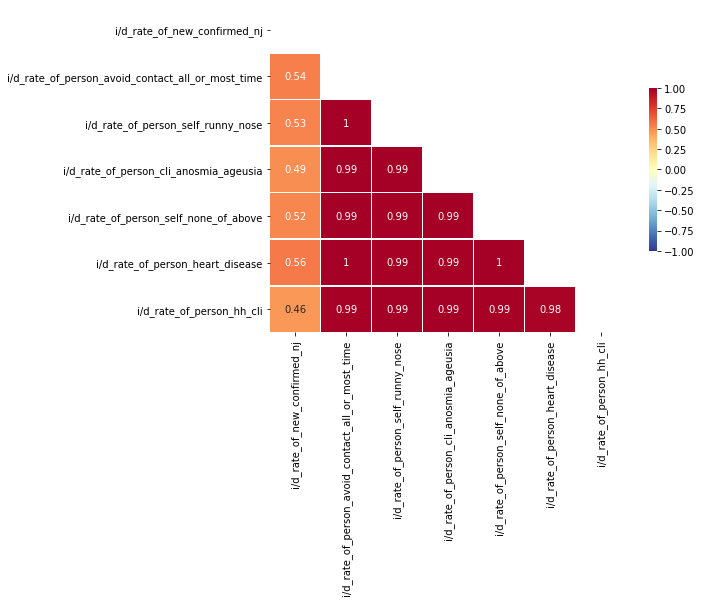

In [68]:
data_35 = data[data['age_bucket'] == '55+'].reset_index()
data_35 = data_35.drop('index', axis = 1)
data_35.head(5)

data_unique = data['state_code'].unique()
#print(data_unique)

ak_35 = data_35[data_35['state_code'] == 'nj']
ak_35 = ak_35.sort_values(by = 'date', ascending = True).reset_index()

ak_35_concat = pd.concat([cases['nj'], ak_35], axis=1)
ak_35_concat

lst_1 = []
for i in ak_35_concat.columns:
    if "pct" not in i:
        lst_1.append(i)
        
#print(lst_1, '\n') 

del lst_1[0]
del lst_1[1]
del lst_1[4]

#print(lst_1)

ak_35_concat_drop = ak_35_concat.drop(lst_1, axis = 1) 
ak_35_concat_drop.head(5)
#print(ak_35_concat_drop.columns)

ak_35_concat_dropped = ak_35_concat_drop.drop(['nj','date', 'summed_n'], axis = 1)

for i in range(len(ak_35_concat_drop)):
    for j in ak_35_concat_dropped.columns:
        ak_35_concat_drop[j][i] = (ak_35_concat_drop[j][i]/100) * ak_35_concat_drop['summed_n'][i]

ak_35_see = ak_35_concat_drop[["nj", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

ak_35_tmp = ak_35_concat_drop[["nj", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

pop_num_div = 8880

for i in ak_35_see.columns:
    #print(i)
    for j in range(len(ak_35_see[str(i)]) ):
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j] = float(ak_35_see[str(i)][j] / pop_num_div) * 100
        #print(ak_18_see[str(i)][j])
        
ak_35_see = ak_35_see
ak_35_tmp = ak_35_see

for i in ak_35_see.columns:
    for j in range(len(ak_35_see[str(i)]) - 1):
        #print(ak_18_see[str(i)][j + 1])
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j + 1] = ak_35_see[str(i)][j + 1] - ak_35_tmp[str(i)][j]     
        
ak_35_see = ak_35_see.iloc[1:]
ak_35_see

ak_35_see.columns = ['i/d_rate_of_new_confirmed_nj', 'i/d_rate_of_person_avoid_contact_all_or_most_time',
       'i/d_rate_of_person_self_runny_nose', 'i/d_rate_of_person_cli_anosmia_ageusia',
       'i/d_rate_of_person_self_none_of_above', 'i/d_rate_of_person_heart_disease',  'i/d_rate_of_person_hh_cli']

corr = ak_35_see.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )
figure = plt.gcf()
figure.set_size_inches(8, 6)
plt.savefig('nj_55.png', bbox_inches="tight")


plt.show()



# Rhode Island / RI

C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


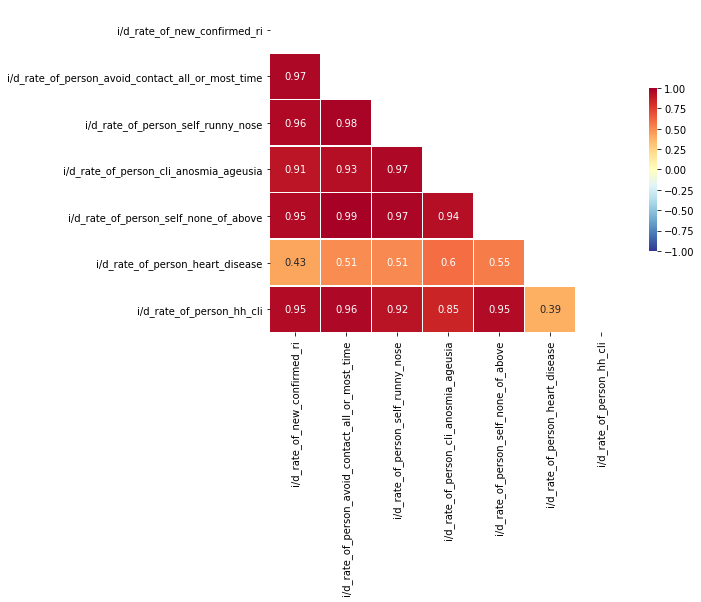

In [69]:
data_35 = data[data['age_bucket'] == '18-34'].reset_index()
data_35 = data_35.drop('index', axis = 1)
data_35.head(5)

data_unique = data['state_code'].unique()
#print(data_unique)

ak_35 = data_35[data_35['state_code'] == 'ri']
ak_35 = ak_35.sort_values(by = 'date', ascending = True).reset_index()

ak_35_concat = pd.concat([cases['ri'], ak_35], axis=1)
ak_35_concat

lst_1 = []
for i in ak_35_concat.columns:
    if "pct" not in i:
        lst_1.append(i)
        
#print(lst_1, '\n') 

del lst_1[0]
del lst_1[1]
del lst_1[4]

#print(lst_1)

ak_35_concat_drop = ak_35_concat.drop(lst_1, axis = 1) 
ak_35_concat_drop.head(5)
#print(ak_35_concat_drop.columns)

ak_35_concat_dropped = ak_35_concat_drop.drop(['ri','date', 'summed_n'], axis = 1)

for i in range(len(ak_35_concat_drop)):
    for j in ak_35_concat_dropped.columns:
        ak_35_concat_drop[j][i] = (ak_35_concat_drop[j][i]/100) * ak_35_concat_drop['summed_n'][i]

ak_35_see = ak_35_concat_drop[["ri", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

ak_35_tmp = ak_35_concat_drop[["ri", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

pop_num_div = 1060

for i in ak_35_see.columns:
    #print(i)
    for j in range(len(ak_35_see[str(i)]) ):
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j] = float(ak_35_see[str(i)][j] / pop_num_div) * 100
        #print(ak_18_see[str(i)][j])
        
ak_35_see = ak_35_see
ak_35_tmp = ak_35_see

for i in ak_35_see.columns:
    for j in range(len(ak_35_see[str(i)]) - 1):
        #print(ak_18_see[str(i)][j + 1])
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j + 1] = ak_35_see[str(i)][j + 1] - ak_35_tmp[str(i)][j]     
        
ak_35_see = ak_35_see.iloc[1:]
ak_35_see
ak_35_see.columns = ['i/d_rate_of_new_confirmed_ri', 'i/d_rate_of_person_avoid_contact_all_or_most_time',
       'i/d_rate_of_person_self_runny_nose', 'i/d_rate_of_person_cli_anosmia_ageusia',
       'i/d_rate_of_person_self_none_of_above', 'i/d_rate_of_person_heart_disease',  'i/d_rate_of_person_hh_cli']

corr = ak_35_see.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )

figure = plt.gcf()
figure.set_size_inches(8, 6)
plt.savefig('ri_18.png', bbox_inches="tight")

plt.show()



C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


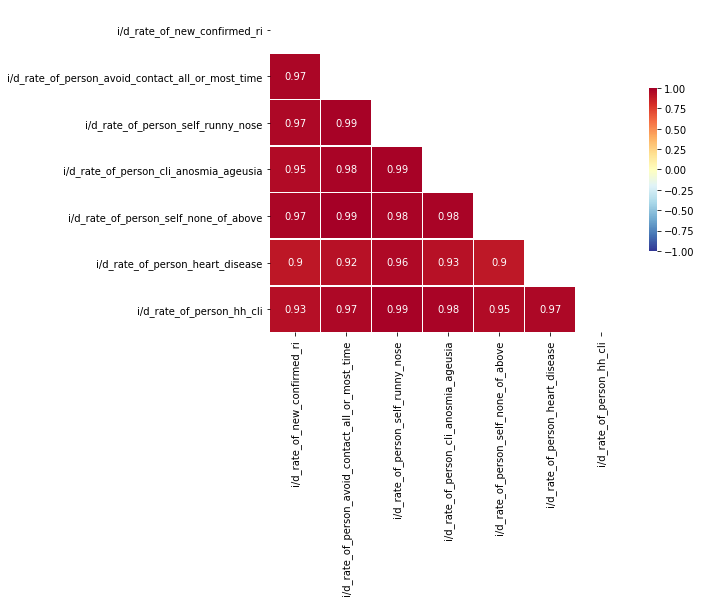

In [70]:
data_35 = data[data['age_bucket'] == '35-54'].reset_index()
data_35 = data_35.drop('index', axis = 1)
data_35.head(5)

data_unique = data['state_code'].unique()
#print(data_unique)

ak_35 = data_35[data_35['state_code'] == 'ri']
ak_35 = ak_35.sort_values(by = 'date', ascending = True).reset_index()

ak_35_concat = pd.concat([cases['ri'], ak_35], axis=1)
ak_35_concat

lst_1 = []
for i in ak_35_concat.columns:
    if "pct" not in i:
        lst_1.append(i)
        
#print(lst_1, '\n') 

del lst_1[0]
del lst_1[1]
del lst_1[4]

#print(lst_1)

ak_35_concat_drop = ak_35_concat.drop(lst_1, axis = 1) 
ak_35_concat_drop.head(5)
#print(ak_35_concat_drop.columns)

ak_35_concat_dropped = ak_35_concat_drop.drop(['ri','date', 'summed_n'], axis = 1)

for i in range(len(ak_35_concat_drop)):
    for j in ak_35_concat_dropped.columns:
        ak_35_concat_drop[j][i] = (ak_35_concat_drop[j][i]/100) * ak_35_concat_drop['summed_n'][i]

ak_35_see = ak_35_concat_drop[["ri", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

ak_35_tmp = ak_35_concat_drop[["ri", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

pop_num_div = 1060

for i in ak_35_see.columns:
    #print(i)
    for j in range(len(ak_35_see[str(i)]) ):
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j] = float(ak_35_see[str(i)][j] / pop_num_div) * 100
        #print(ak_18_see[str(i)][j])
        
ak_35_see = ak_35_see
ak_35_tmp = ak_35_see

for i in ak_35_see.columns:
    for j in range(len(ak_35_see[str(i)]) - 1):
        #print(ak_18_see[str(i)][j + 1])
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j + 1] = ak_35_see[str(i)][j + 1] - ak_35_tmp[str(i)][j]     
        
ak_35_see = ak_35_see.iloc[1:]
ak_35_see
ak_35_see.columns = ['i/d_rate_of_new_confirmed_ri', 'i/d_rate_of_person_avoid_contact_all_or_most_time',
       'i/d_rate_of_person_self_runny_nose', 'i/d_rate_of_person_cli_anosmia_ageusia',
       'i/d_rate_of_person_self_none_of_above', 'i/d_rate_of_person_heart_disease',  'i/d_rate_of_person_hh_cli']

corr = ak_35_see.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )
figure = plt.gcf()
figure.set_size_inches(8, 6)
plt.savefig('ri_35.png', bbox_inches="tight")


plt.show()



C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


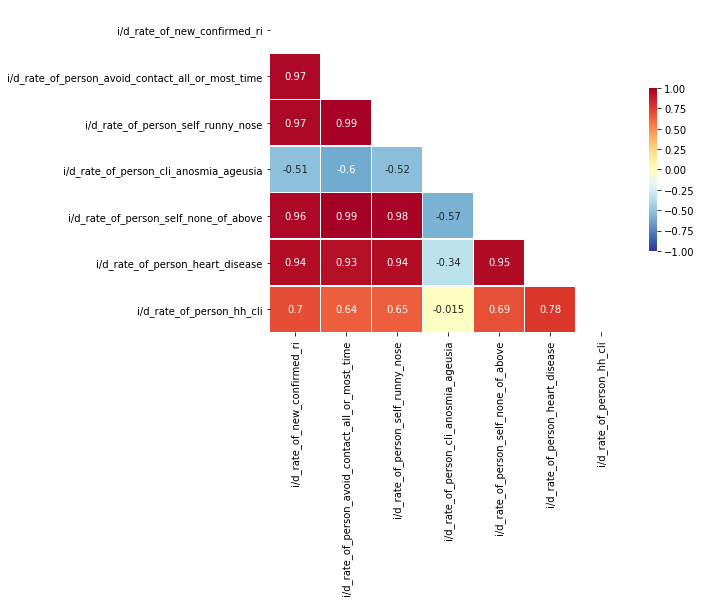

In [71]:
data_35 = data[data['age_bucket'] == '55+'].reset_index()
data_35 = data_35.drop('index', axis = 1)
data_35.head(5)

data_unique = data['state_code'].unique()
#print(data_unique)

ak_35 = data_35[data_35['state_code'] == 'ri']
ak_35 = ak_35.sort_values(by = 'date', ascending = True).reset_index()

ak_35_concat = pd.concat([cases['ri'], ak_35], axis=1)
ak_35_concat

lst_1 = []
for i in ak_35_concat.columns:
    if "pct" not in i:
        lst_1.append(i)
        
#print(lst_1, '\n') 

del lst_1[0]
del lst_1[1]
del lst_1[4]

#print(lst_1)

ak_35_concat_drop = ak_35_concat.drop(lst_1, axis = 1) 
ak_35_concat_drop.head(5)
#print(ak_35_concat_drop.columns)

ak_35_concat_dropped = ak_35_concat_drop.drop(['ri','date', 'summed_n'], axis = 1)

for i in range(len(ak_35_concat_drop)):
    for j in ak_35_concat_dropped.columns:
        ak_35_concat_drop[j][i] = (ak_35_concat_drop[j][i]/100) * ak_35_concat_drop['summed_n'][i]

ak_35_see = ak_35_concat_drop[["ri", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

ak_35_tmp = ak_35_concat_drop[["ri", "smoothed_pct_avoid_contact_all_or_most_time",
"smoothed_pct_self_runny_nose",
"smoothed_pct_cli_anosmia_ageusia","smoothed_pct_self_none_of_above",
"smoothed_pct_heart_disease",
"smoothed_pct_hh_cli"]]

pop_num_div = 1060

for i in ak_35_see.columns:
    #print(i)
    for j in range(len(ak_35_see[str(i)]) ):
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j] = float(ak_35_see[str(i)][j] / pop_num_div) * 100
        #print(ak_18_see[str(i)][j])
        
ak_35_see = ak_35_see
ak_35_tmp = ak_35_see

for i in ak_35_see.columns:
    for j in range(len(ak_35_see[str(i)]) - 1):
        #print(ak_18_see[str(i)][j + 1])
        #print(ak_18_see[str(i)][j])
        ak_35_see[str(i)][j + 1] = ak_35_see[str(i)][j + 1] - ak_35_tmp[str(i)][j]     
        
ak_35_see = ak_35_see.iloc[1:]
ak_35_see
ak_35_see.columns = ['i/d_rate_of_new_confirmed_ri', 'i/d_rate_of_person_avoid_contact_all_or_most_time',
       'i/d_rate_of_person_self_runny_nose', 'i/d_rate_of_person_cli_anosmia_ageusia',
       'i/d_rate_of_person_self_none_of_above', 'i/d_rate_of_person_heart_disease',  'i/d_rate_of_person_hh_cli']

corr = ak_35_see.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )
figure = plt.gcf()
figure.set_size_inches(8, 6)
plt.savefig('ri_55.png', bbox_inches="tight")


plt.show()

